# Importing

In [ ]:
!pip install -q transformers accelerate bitsandbytes peft datasets trl


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 76.1/76.1 MB 29.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 491.2/491.2 kB 29.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 348.0/348.0 kB 27.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 116.3/116.3 kB 9.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 183.9/183.9 kB 15.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 143.5/143.5 kB 13.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 2.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 46.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 84.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 46.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 1.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 11.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━

In [ ]:
from huggingface_hub import login
login()


# Loading the model selected after analysis - llama3

In [ ]:
from transformers import AutoModelForCausalLM, AutoTokenizer, BitsAndBytesConfig

model_id = "meta-llama/Meta-Llama-3-8B-Instruct"

# Optional: speeds up download & caching
from huggingface_hub import hf_hub_download
hf_hub_download(repo_id=model_id, filename="config.json")

# Load tokenizer
tokenizer = AutoTokenizer.from_pretrained(model_id, use_auth_token=True)

# Quantization config (4-bit loading)
bnb_config = BitsAndBytesConfig(
    load_in_4bit=True,
    bnb_4bit_compute_dtype="bfloat16",
    bnb_4bit_use_double_quant=True,
    bnb_4bit_quant_type="nf4",
)

# Load the model in 4-bit
model = AutoModelForCausalLM.from_pretrained(
    model_id,
    quantization_config=bnb_config,
    device_map="auto",
    trust_remote_code=True
)


/usr/local/lib/python3.11/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


config.json:   0%|          | 0.00/654 [00:00<?, ?B/s]

/usr/local/lib/python3.11/dist-packages/transformers/models/auto/tokenization_auto.py:898: FutureWarning: The `use_auth_token` argument is deprecated and will be removed in v5 of Transformers. Please use `token` instead.
  warnings.warn(


tokenizer_config.json:   0%|          | 0.00/51.0k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/9.09M [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/73.0 [00:00<?, ?B/s]

model.safetensors.index.json:   0%|          | 0.00/23.9k [00:00<?, ?B/s]

Fetching 4 files:   0%|          | 0/4 [00:00<?, ?it/s]

model-00001-of-00004.safetensors:   0%|          | 0.00/4.98G [00:00<?, ?B/s]

model-00004-of-00004.safetensors:   0%|          | 0.00/1.17G [00:00<?, ?B/s]

model-00002-of-00004.safetensors:   0%|          | 0.00/5.00G [00:00<?, ?B/s]

model-00003-of-00004.safetensors:   0%|          | 0.00/4.92G [00:00<?, ?B/s]

Loading checkpoint shards:   0%|          | 0/4 [00:00<?, ?it/s]

generation_config.json:   0%|          | 0.00/187 [00:00<?, ?B/s]

# Taking the cleaned file (It has data in llama2 format). All the cleaning and dataset code is provided separately

In [ ]:
from google.colab import files

uploaded = files.upload()  # Choose your file from your system


Saving diabetes_qa_llama2_all_till_date_no_dup.jsonl to diabetes_qa_llama2_all_till_date_no_dup.jsonl


# Converted to llama3 format

In [ ]:
import json

input_file = "diabetes_qa_llama2_all_till_date_no_dup.jsonl"
output_file = "diabetes_qa_llama3_chat_style.jsonl"

with open(input_file, "r", encoding="utf-8") as infile, open(output_file, "w", encoding="utf-8") as outfile:
    for line in infile:
        data = json.loads(line)
        question = data.get("input") or data.get("question")
        answer = data.get("output") or data.get("answer")

        formatted = {
            "messages": [
                {
                    "role": "system",
                    "content": "You are a helpful and knowledgeable medical assistant. Answer the user's diabetes-related question clearly and accurately."
                },
                {
                    "role": "user",
                    "content": question.strip()
                },
                {
                    "role": "assistant",
                    "content": answer.strip()
                }
            ]
        }

        outfile.write(json.dumps(formatted, ensure_ascii=False) + "\n")

print(f" Converted and saved to {output_file}")


✅ Converted and saved to diabetes_qa_llama3_chat_style.jsonl


In [ ]:
with open("diabetes_qa_llama3_chat_style.jsonl", "r", encoding="utf-8") as f:
    for _ in range(3):
        print(json.loads(f.readline()))


{'messages': [{'role': 'system', 'content': "You are a helpful and knowledgeable medical assistant. Answer the user's diabetes-related question clearly and accurately."}, {'role': 'user', 'content': 'Dear doctor, i am 33 male recently i have undergone pre employment medical check up and it was found that i have sgpt- 194 except this all test are absolutely normal test includes 1) CBC2. ESR and liver test 3. Urine Routine 4. Blood Group & Rh Factor 5. X-ray (Chest)6. General Physical Examination7. Fasting Blood Sugar &Post Prandial Blood Sugar8. Total Cholesterol9. ECG10. Serum Creatininenow they have advised me to got my ultrasound done full abdomen. i have got it done today and every thing is normal and they found mild fatty liver. Another thing i want to share that i was suffering from loose motions and was on Ofloxacin-200mg with ornidazole500mg B.D dosage (oflox OZ )medication for 2days and continued ofloxacin-200 B.D dosage (oflox) for another 3days as was suffering cold and cough

# Trying out the base model before tuning - everything works fine

In [ ]:
from transformers import AutoModelForCausalLM, AutoTokenizer, BitsAndBytesConfig

model_id = "meta-llama/Meta-Llama-3-8B-Instruct"

tokenizer = AutoTokenizer.from_pretrained(model_id, use_auth_token=True)

bnb_config = BitsAndBytesConfig(
    load_in_4bit=True,
    bnb_4bit_compute_dtype="bfloat16",
    bnb_4bit_use_double_quant=True,
    bnb_4bit_quant_type="nf4",
)

model = AutoModelForCausalLM.from_pretrained(
    model_id,
    quantization_config=bnb_config,
    device_map="auto",
    trust_remote_code=True
)


/usr/local/lib/python3.11/dist-packages/transformers/models/auto/tokenization_auto.py:898: FutureWarning: The `use_auth_token` argument is deprecated and will be removed in v5 of Transformers. Please use `token` instead.
  warnings.warn(


Loading checkpoint shards:   0%|          | 0/4 [00:00<?, ?it/s]

In [ ]:
questions = [
    "What are the early symptoms of type 2 diabetes?",
    "Can type 1 diabetes be reversed?",
    "What foods should I avoid if I have diabetes?",
    "How does diabetes affect heart health?",
    "Is intermittent fasting safe for diabetics?"
]

# Questions tried on based model

In [ ]:
import torch

def generate_response(prompt):
    input_ids = tokenizer(prompt, return_tensors="pt").input_ids.to(model.device)
    with torch.no_grad():
        outputs = model.generate(
            input_ids,
            max_new_tokens=300,
            do_sample=True,
            temperature=0.7,
            top_p=0.9,
            repetition_penalty=1.1,
            pad_token_id=tokenizer.eos_token_id,
        )
    return tokenizer.decode(outputs[0], skip_special_tokens=True)

# Sample diabetes questions
questions = [
    "What are the early symptoms of type 2 diabetes?",
    "Can type 1 diabetes be reversed?",
    "What foods should I avoid if I have diabetes?",
    "How does diabetes affect heart health?",
    "Is intermittent fasting safe for diabetics?"
]

# Generate and print answers
for idx, question in enumerate(questions, 1):
    print(f"\nQuestion {idx}: {question}")
    answer = generate_response(question)
    print(f"Answer {idx}: {answer}")


The attention mask is not set and cannot be inferred from input because pad token is same as eos token. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.



Question 1: What are the early symptoms of type 2 diabetes?
Answer 1: What are the early symptoms of type 2 diabetes? | Health24
Type 2 diabetes is a condition where the body becomes resistant to insulin, a hormone produced by the pancreas that regulates blood sugar levels. The early symptoms of type 2 diabetes can be subtle and may not always be obvious.
Some common early symptoms of type 2 diabetes include:
1. Increased thirst: Type 2 diabetes can cause an increased thirst due to high blood sugar levels.
2. Frequent urination: As your body tries to rid itself of excess glucose in the urine, you may experience more frequent trips to the bathroom.
3. Fatigue: High blood sugar levels can cause fatigue, weakness, and lethargy.
4. Blurred vision: High blood sugar levels can cause changes in your vision, such as blurred vision or double vision.
5. Slow healing wounds: People with type 2 diabetes may have slower healing times for cuts, scrapes, and other wounds due to impaired circulation.

In [ ]:
!ls /content/


combined_2_diabetes_all_data_till_now.csv
diabetes_qa_llama2_all_till_date_no_dup.jsonl
diabetes_qa_llama3_chat_style.jsonl
sample_data


In [ ]:
from datasets import load_dataset

# Load your correctly formatted chat-style file
dataset = load_dataset("json", data_files="/content/diabetes_qa_llama3_chat_style.jsonl")
print(dataset)
print(dataset["train"][0])


Generating train split: 0 examples [00:00, ? examples/s]

DatasetDict({
    train: Dataset({
        features: ['messages'],
        num_rows: 4277
    })
})
{'messages': [{'role': 'system', 'content': "You are a helpful and knowledgeable medical assistant. Answer the user's diabetes-related question clearly and accurately."}, {'role': 'user', 'content': 'Dear doctor, i am 33 male recently i have undergone pre employment medical check up and it was found that i have sgpt- 194 except this all test are absolutely normal test includes 1) CBC2. ESR and liver test 3. Urine Routine 4. Blood Group & Rh Factor 5. X-ray (Chest)6. General Physical Examination7. Fasting Blood Sugar &Post Prandial Blood Sugar8. Total Cholesterol9. ECG10. Serum Creatininenow they have advised me to got my ultrasound done full abdomen. i have got it done today and every thing is normal and they found mild fatty liver. Another thing i want to share that i was suffering from loose motions and was on Ofloxacin-200mg with ornidazole500mg B.D dosage (oflox OZ )medication for 2d

# Issues

Map:   0%|          | 0/4277 [00:00<?, ? examples/s]

ValueError: Asking to pad but the tokenizer does not have a padding token. Please select a token to use as `pad_token` `(tokenizer.pad_token = tokenizer.eos_token e.g.)` or add a new pad token via `tokenizer.add_special_tokens({'pad_token': '[PAD]'})`.

# Preprocessing

In [ ]:
def preprocess_chat(example):
    system_prompt = ""
    user_prompt = ""
    assistant_response = ""

    for message in example["messages"]:
        if message["role"] == "system":
            system_prompt = message["content"]
        elif message["role"] == "user":
            user_prompt = message["content"]
        elif message["role"] == "assistant":
            assistant_response = message["content"]

    # Format into a single prompt (Llama 3 chat style)
    prompt = (
        f"<|begin_of_text|><|start_header_id|>system<|end_header_id|>\n{system_prompt}<|eot_id|>"
        f"<|start_header_id|>user<|end_header_id|>\n{user_prompt}<|eot_id|>"
        f"<|start_header_id|>assistant<|end_header_id|>\n"
    )

    return {
        "prompt": prompt,
        "completion": assistant_response + "<|eot_id|>"
    }

# Apply this on your dataset
processed_dataset = dataset["train"].map(
    preprocess_chat,
    remove_columns=["messages"],
)

# Check one sample
print(processed_dataset[0])


Map:   0%|          | 0/4277 [00:00<?, ? examples/s]

{'prompt': "<|begin_of_text|><|start_header_id|>system<|end_header_id|>\nYou are a helpful and knowledgeable medical assistant. Answer the user's diabetes-related question clearly and accurately.<|eot_id|><|start_header_id|>user<|end_header_id|>\nDear doctor, i am 33 male recently i have undergone pre employment medical check up and it was found that i have sgpt- 194 except this all test are absolutely normal test includes 1) CBC2. ESR and liver test 3. Urine Routine 4. Blood Group & Rh Factor 5. X-ray (Chest)6. General Physical Examination7. Fasting Blood Sugar &Post Prandial Blood Sugar8. Total Cholesterol9. ECG10. Serum Creatininenow they have advised me to got my ultrasound done full abdomen. i have got it done today and every thing is normal and they found mild fatty liver. Another thing i want to share that i was suffering from loose motions and was on Ofloxacin-200mg with ornidazole500mg B.D dosage (oflox OZ )medication for 2days and continued ofloxacin-200 B.D dosage (oflox) fo

# Setting the padding token

In [ ]:
# Set the padding token for the tokenizer and model
# Explanation:
# Llama 3 models (and similar) don't have a default padding token because they are trained mostly without padding.
# During finetuning or batching, we *must* tell the model how to pad sequences properly.
# A common trick is to use the eos_token (end of sequence token) as the pad_token.

# Set the tokenizer's pad token to be the same as its EOS token
tokenizer.pad_token = tokenizer.eos_token

# Set the tokenizer's pad_token_id to match the eos_token_id
tokenizer.pad_token_id = tokenizer.eos_token_id

# Also update the model config so it knows about the pad token
model.config.pad_token_id = tokenizer.pad_token_id

print(" Tokenizer and model padding setup done.")


✅ Tokenizer and model padding setup done.


In [ ]:
# Verify padding settings

print("Pad token:", tokenizer.pad_token)
print("Pad token ID:", tokenizer.pad_token_id)
print("EOS token:", tokenizer.eos_token)
print("EOS token ID:", tokenizer.eos_token_id)
print("Model pad_token_id:", model.config.pad_token_id)

# Extra check:
# Let's tokenize a simple example and see if padding behaves correctly
sample = tokenizer(["Hello, how are you?", "Hi!"], padding="max_length", max_length=10, return_tensors="pt")
print("\nTokenized sample (input_ids):")
print(sample.input_ids)
print("\nTokenized sample (attention_mask):")
print(sample.attention_mask)


Pad token: <|eot_id|>
Pad token ID: 128009
EOS token: <|eot_id|>
EOS token ID: 128009
Model pad_token_id: 128009

Tokenized sample (input_ids):
tensor([[128000,   9906,     11,   1268,    527,    499,     30, 128009, 128009,
         128009],
        [128000,  13347,      0, 128009, 128009, 128009, 128009, 128009, 128009,
         128009]])

Tokenized sample (attention_mask):
tensor([[1, 1, 1, 1, 1, 1, 1, 0, 0, 0],
        [1, 1, 1, 0, 0, 0, 0, 0, 0, 0]])


In [ ]:
# Tokenization function: prepares input_ids, attention_mask, and labels
def tokenize_prompt_completion(example):
    # Tokenize the prompt (system + user)
    prompt_ids = tokenizer(
        example["prompt"],
        truncation=True,
        padding="max_length",
        max_length=512,
    )

    # Tokenize the completion (assistant response)
    completion_ids = tokenizer(
        example["completion"],
        truncation=True,
        padding="max_length",
        max_length=512,
    )

    # Set padding tokens to -100 for labels
    labels = [
        (token_id if token_id != tokenizer.pad_token_id else -100)
        for token_id in completion_ids["input_ids"]
    ]

    return {
        "input_ids": prompt_ids["input_ids"],
        "attention_mask": prompt_ids["attention_mask"],
        "labels": labels,
    }

# Apply the tokenizer to your dataset
final_dataset = processed_dataset.map(
    tokenize_prompt_completion,
    remove_columns=processed_dataset.column_names,
    batched=False
)

# Print one sample to verify
print(final_dataset[0])


Map:   0%|          | 0/4277 [00:00<?, ? examples/s]

{'input_ids': [128000, 128000, 128006, 9125, 128007, 198, 2675, 527, 264, 11190, 323, 42066, 6593, 18328, 13, 22559, 279, 1217, 596, 20335, 14228, 3488, 9539, 323, 30357, 13, 128009, 128006, 882, 128007, 198, 31765, 10896, 11, 602, 1097, 220, 1644, 8762, 6051, 602, 617, 64238, 864, 14740, 6593, 1817, 709, 323, 433, 574, 1766, 430, 602, 617, 31773, 418, 12, 220, 6393, 3734, 420, 682, 1296, 527, 11112, 4725, 1296, 5764, 220, 16, 8, 46612, 17, 13, 469, 14899, 323, 26587, 1296, 220, 18, 13, 17229, 483, 72162, 220, 19, 13, 20671, 5856, 612, 18452, 38829, 220, 20, 13, 1630, 30630, 320, 34, 6536, 8, 21, 13, 3331, 28479, 72594, 22, 13, 435, 15067, 20671, 32019, 612, 4226, 2394, 438, 532, 20671, 32019, 23, 13, 10884, 921, 35244, 24, 13, 469, 8974, 605, 13, 94591, 18134, 258, 17090, 363, 814, 617, 26160, 757, 311, 2751, 856, 63859, 2884, 2539, 64772, 13, 602, 617, 2751, 433, 2884, 3432, 323, 1475, 3245, 374, 4725, 323, 814, 1766, 23900, 40085, 26587, 13, 13596, 3245, 602, 1390, 311, 4430, 430, 6

In [ ]:
# Save the final tokenized dataset
final_dataset.save_to_disk("/content/diabetes_llama3_ready_dataset")

print(" Saved final tokenized dataset successfully!")


Saving the dataset (0/1 shards):   0%|          | 0/4277 [00:00<?, ? examples/s]

✅ Saved final tokenized dataset successfully!


# Issues while training

In [ ]:
from peft import LoraConfig, get_peft_model
from transformers import Trainer, DefaultDataCollator
import torch

# ── 1️⃣  LIGHT LoRA CONFIG (tweak later if you like) ────────────────────────────
lora_cfg = LoraConfig(
    r=8,                     # rank
    lora_alpha=32,
    target_modules=["q_proj", "k_proj", "v_proj", "o_proj"],  # common for Llama-3
    lora_dropout=0.05,
    bias="none",
    task_type="CAUSAL_LM",
)

# Wrap the base model with LoRA
model = get_peft_model(model, lora_cfg)
model.print_trainable_parameters()  # sanity-check: only ~0.1% should be trainable

# ── 2️⃣  DATA-COLLATOR  (pads to multiple of 8 for GPU efficiency) ─────────────
data_collator = DefaultDataCollator(return_tensors="pt", pad_to_multiple_of=8)

# ── 3️⃣  TRAINER  ───────────────────────────────────────────────────────────────
trainer = Trainer(
    model=model,
    args=training_args,                     # defined in the previous step
    train_dataset=tokenized_dataset["train"],
    data_collator=data_collator,
)

print(" Trainer created. Ready to train!")


trainable params: 6,815,744 || all params: 8,037,076,992 || trainable%: 0.0848


TypeError: DefaultDataCollator.__init__() got an unexpected keyword argument 'pad_to_multiple_of'

In [ ]:
from transformers import DataCollatorForLanguageModeling

# Correct data collator for language modeling
data_collator = DataCollatorForLanguageModeling(
    tokenizer=tokenizer,
    mlm=False,               # No masked language modeling (we are doing causal LM)
    pad_to_multiple_of=8     # GPU efficiency
)


# Arguments set

In [ ]:
from transformers import TrainingArguments

# Define training arguments without unsupported parameters
training_args = TrainingArguments(
    output_dir="/content/llama3_diabetes_lora",  # where to save model/checkpoints
    per_device_train_batch_size=4,
    gradient_accumulation_steps=2,
    num_train_epochs=3,
    learning_rate=2e-4,
    logging_steps=10,
    save_steps=100,
    save_total_limit=1,  # only keep latest checkpoint
    fp16=True,  # for modern GPUs like A100
    report_to=[]  # disable logging to any external services like Hugging Face
)

print(" TrainingArguments set up successfully.")


✅ TrainingArguments set up successfully.


# Trainer initialized, will finetune next

In [ ]:
from transformers import Trainer

# Initialize the Trainer
trainer = Trainer(
    model=model,
    args=training_args,
    train_dataset=processed_dataset,   # << corrected here
    data_collator=data_collator,
)

print(" Trainer initialized. Ready to fine-tune the model!")


No label_names provided for model class `PeftModelForCausalLM`. Since `PeftModel` hides base models input arguments, if label_names is not given, label_names can't be set automatically within `Trainer`. Note that empty label_names list will be used instead.


✅ Trainer initialized. Ready to fine-tune the model!


# Issues in training (CPU/GPU) issues

In [ ]:
trainer.train()

ValueError: No columns in the dataset match the model's forward method signature. The following columns have been ignored: [prompt, completion]. Please check the dataset and model. You may need to set `remove_unused_columns=False` in `TrainingArguments`.

In [ ]:
from transformers import TrainingArguments

training_args = TrainingArguments(
    output_dir="/content/llama3_diabetes_lora",  # output directory
    per_device_train_batch_size=4,
    gradient_accumulation_steps=2,
    num_train_epochs=3,
    learning_rate=2e-4,
    bf16=True,                     # Use bf16 if supported
    optim="paged_adamw_32bit",      # memory efficient optimizer
    logging_steps=10,
    save_steps=50,
    save_total_limit=2,
    evaluation_strategy="no",      # (no eval during training since no val set)
    remove_unused_columns=False,   # 🛑 <<< ADD THIS LINE
    push_to_hub=False,
    report_to="none",
)


TypeError: TrainingArguments.__init__() got an unexpected keyword argument 'evaluation_strategy'

In [ ]:
from transformers import TrainingArguments

training_args = TrainingArguments(
    output_dir="/content/llama3_diabetes_lora",  # output directory
    per_device_train_batch_size=4,
    gradient_accumulation_steps=2,
    num_train_epochs=3,
    learning_rate=2e-4,
    bf16=True,                     # Use bf16 if supported
    optim="paged_adamw_32bit",      # memory efficient optimizer
    logging_steps=10,
    save_steps=50,
    save_total_limit=2,
    remove_unused_columns=False,   # 🛑 Important fix for your dataset
    push_to_hub=False,
    report_to="none",
)


In [ ]:
tokenized_dataset = processed_dataset


In [ ]:
from transformers import Trainer

trainer = Trainer(
    model=model,                      # LoRA wrapped model
    args=training_args,               # TrainingArguments already defined
    train_dataset=tokenized_dataset,  # No ["train"] needed
    data_collator=data_collator,      # Data collator for causal LM
)

print(" Trainer initialized. Ready to train!")


No label_names provided for model class `PeftModelForCausalLM`. Since `PeftModel` hides base models input arguments, if label_names is not given, label_names can't be set automatically within `Trainer`. Note that empty label_names list will be used instead.


✅ Trainer initialized. Ready to train!


In [ ]:
trainer.train()

ValueError: You should supply an encoding or a list of encodings to this method that includes input_ids, but you provided ['prompt', 'completion']

In [ ]:
# Tokenization function
def tokenize_prompt_completion(example):
    # Tokenize the full prompt
    prompt = tokenizer(
        example["prompt"],
        padding="max_length",
        max_length=512,   # or 1024 if GPU memory allows
        truncation=True,
        return_tensors="pt",
    )

    # Tokenize the completion
    completion = tokenizer(
        example["completion"],
        padding="max_length",
        max_length=512,
        truncation=True,
        return_tensors="pt",
    )

    # Combine prompt + completion
    input_ids = torch.cat([prompt.input_ids.squeeze(), completion.input_ids.squeeze()], dim=0)
    attention_mask = torch.cat([prompt.attention_mask.squeeze(), completion.attention_mask.squeeze()], dim=0)

    labels = input_ids.clone()
    labels[:prompt.input_ids.size(1)] = -100  # Mask prompt part during loss calculation

    return {
        "input_ids": input_ids,
        "attention_mask": attention_mask,
        "labels": labels,
    }

# Apply tokenization to dataset
tokenized_dataset = processed_dataset.map(
    tokenize_prompt_completion,
    remove_columns=["prompt", "completion"],
    batched=False,
)

print(" Dataset tokenized successfully!")


Map:   0%|          | 0/4277 [00:00<?, ? examples/s]

✅ Dataset tokenized successfully!


In [ ]:
trainer.print(processed_dataset[0])
()

AttributeError: 'Trainer' object has no attribute 'print'

In [ ]:
print(tokenized_dataset[0])


{'input_ids': [128000, 128000, 128006, 9125, 128007, 198, 2675, 527, 264, 11190, 323, 42066, 6593, 18328, 13, 22559, 279, 1217, 596, 20335, 14228, 3488, 9539, 323, 30357, 13, 128009, 128006, 882, 128007, 198, 31765, 10896, 11, 602, 1097, 220, 1644, 8762, 6051, 602, 617, 64238, 864, 14740, 6593, 1817, 709, 323, 433, 574, 1766, 430, 602, 617, 31773, 418, 12, 220, 6393, 3734, 420, 682, 1296, 527, 11112, 4725, 1296, 5764, 220, 16, 8, 46612, 17, 13, 469, 14899, 323, 26587, 1296, 220, 18, 13, 17229, 483, 72162, 220, 19, 13, 20671, 5856, 612, 18452, 38829, 220, 20, 13, 1630, 30630, 320, 34, 6536, 8, 21, 13, 3331, 28479, 72594, 22, 13, 435, 15067, 20671, 32019, 612, 4226, 2394, 438, 532, 20671, 32019, 23, 13, 10884, 921, 35244, 24, 13, 469, 8974, 605, 13, 94591, 18134, 258, 17090, 363, 814, 617, 26160, 757, 311, 2751, 856, 63859, 2884, 2539, 64772, 13, 602, 617, 2751, 433, 2884, 3432, 323, 1475, 3245, 374, 4725, 323, 814, 1766, 23900, 40085, 26587, 13, 13596, 3245, 602, 1390, 311, 4430, 430, 6

In [ ]:
from transformers import Trainer

trainer = Trainer(
    model=model,
    args=training_args,
    train_dataset=tokenized_dataset,  #  Not tokenized_dataset["train"], just tokenized_dataset
    data_collator=data_collator,
)

print(" Trainer created. Now ready to train!")


No label_names provided for model class `PeftModelForCausalLM`. Since `PeftModel` hides base models input arguments, if label_names is not given, label_names can't be set automatically within `Trainer`. Note that empty label_names list will be used instead.


✅ Trainer created. Now ready to train!


In [ ]:
trainer.train()


OutOfMemoryError: CUDA out of memory. Tried to allocate 112.00 MiB. GPU 0 has a total capacity of 39.56 GiB of which 74.88 MiB is free. Process 5158 has 39.47 GiB memory in use. Of the allocated memory 38.74 GiB is allocated by PyTorch, and 237.22 MiB is reserved by PyTorch but unallocated. If reserved but unallocated memory is large try setting PYTORCH_CUDA_ALLOC_CONF=expandable_segments:True to avoid fragmentation.  See documentation for Memory Management  (https://pytorch.org/docs/stable/notes/cuda.html#environment-variables)

In [ ]:
from transformers import TrainingArguments

training_args = TrainingArguments(
    output_dir="/content/llama3_diabetes_lora",
    per_device_train_batch_size=1,    #  reduce batch size to 1
    gradient_accumulation_steps=4,    #  accumulate gradients across 4 steps to simulate larger batch
    num_train_epochs=3,
    optim="paged_adamw_32bit",
    logging_steps=10,
    save_steps=50,
    save_total_limit=1,
    bf16=True,
    learning_rate=2e-4,
    warmup_ratio=0.1,
    lr_scheduler_type="cosine",
    weight_decay=0.01,
    report_to="none",
    remove_unused_columns=False,   #  needed because input format is custom
    push_to_hub=False,
)


In [ ]:
trainer = Trainer(
    model=model,
    args=training_args,
    train_dataset=tokenized_dataset,
    data_collator=data_collator,
)

print(" Trainer ready again. Now try to train!")


No label_names provided for model class `PeftModelForCausalLM`. Since `PeftModel` hides base models input arguments, if label_names is not given, label_names can't be set automatically within `Trainer`. Note that empty label_names list will be used instead.


✅ Trainer ready again. Now try to train!


In [ ]:
trainer.train()


OutOfMemoryError: CUDA out of memory. Tried to allocate 112.00 MiB. GPU 0 has a total capacity of 39.56 GiB of which 74.88 MiB is free. Process 5158 has 39.47 GiB memory in use. Of the allocated memory 38.87 GiB is allocated by PyTorch, and 104.33 MiB is reserved by PyTorch but unallocated. If reserved but unallocated memory is large try setting PYTORCH_CUDA_ALLOC_CONF=expandable_segments:True to avoid fragmentation.  See documentation for Memory Management  (https://pytorch.org/docs/stable/notes/cuda.html#environment-variables)

# Finally, training done

In [ ]:
from transformers import (
    AutoTokenizer, AutoModelForCausalLM, BitsAndBytesConfig
)
from peft import LoraConfig, get_peft_model
import torch, os

model_id = "meta-llama/Meta-Llama-3-8B-Instruct"   # same as before

bnb_cfg = BitsAndBytesConfig(
    load_in_4bit=True,
    bnb_4bit_compute_dtype="bfloat16",
    bnb_4bit_use_double_quant=True,
    bnb_4bit_quant_type="nf4",
)

tokenizer = AutoTokenizer.from_pretrained(model_id, use_auth_token=True)
tokenizer.pad_token = tokenizer.eos_token        # keep padding fix

model = AutoModelForCausalLM.from_pretrained(
    model_id,
    quantization_config=bnb_cfg,
    device_map="auto",
    trust_remote_code=True
)

# ── enable gradient-checkpointing to cut memory ──
model.gradient_checkpointing_enable()
model.config.use_cache = False


/usr/local/lib/python3.11/dist-packages/transformers/models/auto/tokenization_auto.py:898: FutureWarning: The `use_auth_token` argument is deprecated and will be removed in v5 of Transformers. Please use `token` instead.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


Loading checkpoint shards:   0%|          | 0/4 [00:00<?, ?it/s]

In [ ]:
from datasets import load_from_disk

tokenized_dataset = load_from_disk("/content/diabetes_tokenized")
print(" tokenized dataset reloaded:", tokenized_dataset)


FileNotFoundError: Directory /content/diabetes_tokenized not found

In [ ]:
from datasets import load_dataset

RAW_PATH = "/content/diabetes_qa_llama2_all_till_date_no_dup.jsonl"   # adjust if stored elsewhere

# Load the file (it has one JSON object per line)
raw_ds = load_dataset("json", data_files=RAW_PATH, split="train")

print(" loaded raw dataset; rows:", len(raw_ds))
print(raw_ds[0])          # quick peek


✅ loaded raw dataset; rows: 4277
{'instruction': "You are a helpful and knowledgeable medical assistant. Answer the user's diabetes-related question clearly and accurately.", 'input': 'Dear doctor, i am 33 male recently i have undergone pre employment medical check up and it was found that i have sgpt- 194 except this all test are absolutely normal test includes 1) CBC2. ESR and liver test 3. Urine Routine 4. Blood Group & Rh Factor 5. X-ray (Chest)6. General Physical Examination7. Fasting Blood Sugar &Post Prandial Blood Sugar8. Total Cholesterol9. ECG10. Serum Creatininenow they have advised me to got my ultrasound done full abdomen. i have got it done today and every thing is normal and they found mild fatty liver. Another thing i want to share that i was suffering from loose motions and was on Ofloxacin-200mg with ornidazole500mg B.D dosage (oflox OZ )medication for 2days and continued ofloxacin-200 B.D dosage (oflox) for another 3days as was suffering cold and cough also.now i nee

In [ ]:
def to_prompt_completion(example):
    # Build the prompt in Llama-3 “chat” syntax
    prompt = (
        "<|begin_of_text|>"
        "<|start_header_id|>system<|end_header_id|>\n"
        f"{example['instruction']}<|eot_id|>"
        "<|start_header_id|>user<|end_header_id|>\n"
        f"{example['input']}<|eot_id|>"
        "<|start_header_id|>assistant<|end_header_id|>\n"
    )
    completion = example["output"] + "<|eot_id|>"
    return {"prompt": prompt, "completion": completion}

# convert + keep only the new columns
proc_ds = raw_ds.map(
    to_prompt_completion,
    remove_columns=raw_ds.column_names,
)

print(" prompts built; sample ↓")
print(proc_ds[0])


Map:   0%|          | 0/4277 [00:00<?, ? examples/s]

✅ prompts built; sample ↓
{'prompt': "<|begin_of_text|><|start_header_id|>system<|end_header_id|>\nYou are a helpful and knowledgeable medical assistant. Answer the user's diabetes-related question clearly and accurately.<|eot_id|><|start_header_id|>user<|end_header_id|>\nDear doctor, i am 33 male recently i have undergone pre employment medical check up and it was found that i have sgpt- 194 except this all test are absolutely normal test includes 1) CBC2. ESR and liver test 3. Urine Routine 4. Blood Group & Rh Factor 5. X-ray (Chest)6. General Physical Examination7. Fasting Blood Sugar &Post Prandial Blood Sugar8. Total Cholesterol9. ECG10. Serum Creatininenow they have advised me to got my ultrasound done full abdomen. i have got it done today and every thing is normal and they found mild fatty liver. Another thing i want to share that i was suffering from loose motions and was on Ofloxacin-200mg with ornidazole500mg B.D dosage (oflox OZ )medication for 2days and continued ofloxacin

In [ ]:
max_len = 2048          # Llama-3 context length (stay conservative on Colab)

def tokenize_and_mask(example):
    # ① Tokenise the whole sequence (prompt+completion)
    ids = tokenizer(
        example["prompt"] + example["completion"],
        truncation=True,
        max_length=max_len,
        padding="max_length",       # keeps tensors same length → faster
    )

    # ② Create labels = input_ids, but mask the prompt tokens with -100
    input_ids = ids["input_ids"]
    prompt_len = len(
        tokenizer(example["prompt"])["input_ids"]
    )                       # how many tokens belong to the prompt

    labels = [-100] * max_len      # start with all masked
    labels[prompt_len:] = input_ids[prompt_len:]  # let the model learn only assistant part

    ids["labels"] = labels
    return ids

tokenized_ds = proc_ds.map(
    tokenize_and_mask,
    remove_columns=proc_ds.column_names,
    batched=False,            # pure Python fn → keep False
)

print(" tokenisation done; sample:")
print({k: tokenized_ds[0][k][:40] for k in ["input_ids", "labels"]})


Map:   0%|          | 0/4277 [00:00<?, ? examples/s]

✅ tokenisation done; sample:
{'input_ids': [128000, 128000, 128006, 9125, 128007, 198, 2675, 527, 264, 11190, 323, 42066, 6593, 18328, 13, 22559, 279, 1217, 596, 20335, 14228, 3488, 9539, 323, 30357, 13, 128009, 128006, 882, 128007, 198, 31765, 10896, 11, 602, 1097, 220, 1644, 8762, 6051], 'labels': [-100, -100, -100, -100, -100, -100, -100, -100, -100, -100, -100, -100, -100, -100, -100, -100, -100, -100, -100, -100, -100, -100, -100, -100, -100, -100, -100, -100, -100, -100, -100, -100, -100, -100, -100, -100, -100, -100, -100, -100]}


In [ ]:
from peft import LoraConfig, get_peft_model

# ── tiny LoRA head (≈0.08 % parameters) ─────────────────────────
lora_cfg = LoraConfig(
    r=8,                       # rank
    lora_alpha=32,
    lora_dropout=0.05,
    target_modules=["q_proj", "k_proj", "v_proj", "o_proj"],  # standard for Llama-3
    bias="none",
    task_type="CAUSAL_LM",
)

model = get_peft_model(model, lora_cfg)
model.print_trainable_parameters()      # sanity-check


trainable params: 6,815,744 || all params: 8,037,076,992 || trainable%: 0.0848


In [ ]:
from transformers import (
    DataCollatorForLanguageModeling,
    TrainingArguments,
    Trainer,
)

# 1️⃣  Data-collator (pads to multiples of 8 so the GPU is happy)
data_collator = DataCollatorForLanguageModeling(
    tokenizer=tokenizer,
    mlm=False,               # causal-LM, no masking
    pad_to_multiple_of=8
)

# 2️⃣  Training arguments – VERY small to fit into RAM (tweak later)
training_args = TrainingArguments(
    output_dir="/content/llama3_diabetes_lora",
    per_device_train_batch_size=1,          # tiny batch → low VRAM
    gradient_accumulation_steps=16,         # effective batch = 16
    num_train_epochs=1,                     # start with one epoch
    learning_rate=2e-4,
    fp16=True,                              # 16-bit helps memory
    logging_steps=25,
    save_steps=200,                         # checkpoint every 200 steps
    save_total_limit=2,
    remove_unused_columns=False,            # our dataset keeps only model-needed cols
    report_to="none",
)

# 3️⃣  Trainer
trainer = Trainer(
    model=model,
    args=training_args,
    train_dataset=tok_ds,       # ← the tokenised dataset from the previous step
    data_collator=data_collator,
)

print(" Trainer is ready – call `trainer.train()` to start fine-tuning.")


NameError: name 'tok_ds' is not defined

In [ ]:
# ■ If you STILL have `proc_ds` (the prompt/completion version) in memory:
tok_ds = proc_ds.map(
    lambda ex: tokenizer(
        ex["prompt"],
        text_target=ex["completion"],
        truncation=True,
        max_length=1024,
        padding="max_length",
    ),
    remove_columns=proc_ds.column_names,
)
tok_ds.set_format(type="torch")
print(" tokenised dataset rebuilt; rows:", len(tok_ds))


Map:   0%|          | 0/4277 [00:00<?, ? examples/s]

✅ tokenised dataset rebuilt; rows: 4277


In [ ]:
#    (e.g. after a fresh restart) you need to redo BOTH steps:
#    a) build prompt-completion  b) tokenise
#    Here’s the compact version:

def to_prompt_completion(ex):
    prompt = (
        "<|begin_of_text|>"
        "<|start_header_id|>system<|end_header_id|>\n"
        f"{ex['instruction']}<|eot_id|>"
        "<|start_header_id|>user<|end_header_id|>\n"
        f"{ex['input']}<|eot_id|>"
        "<|start_header_id|>assistant<|end_header_id|>\n"
    )
    return {
        "prompt": prompt,
        "completion": ex["output"] + "<|eot_id|>"
    }

proc_ds = raw_ds.map(to_prompt_completion, remove_columns=raw_ds.column_names)

tok_ds = proc_ds.map(
    lambda ex: tokenizer(
        ex["prompt"],
        text_target=ex["completion"],
        truncation=True,
        max_length=1024,
        padding="max_length",
    ),
    remove_columns=proc_ds.column_names,
)
tok_ds.set_format(type="torch")
print(" prompt-build & tokenisation done; rows:", len(tok_ds))


Map:   0%|          | 0/4277 [00:00<?, ? examples/s]

Map:   0%|          | 0/4277 [00:00<?, ? examples/s]

✅ prompt-build & tokenisation done; rows: 4277


# Issues

In [ ]:
from transformers import Trainer

trainer = Trainer(
    model=model,
    args=training_args,   # the TrainingArguments you defined earlier
    train_dataset=tok_ds, # <-- now it exists
    data_collator=data_collator,
)

print(" Trainer initialised.  Call `trainer.train()` to start fine-tuning.")


No label_names provided for model class `PeftModelForCausalLM`. Since `PeftModel` hides base models input arguments, if label_names is not given, label_names can't be set automatically within `Trainer`. Note that empty label_names list will be used instead.


✅ Trainer initialised.  Call `trainer.train()` to start fine-tuning.


In [ ]:
/usr/local/lib/python3.11/dist-packages/torch/utils/checkpoint.py:87: UserWarning: None of the inputs have requires_grad=True. Gradients will be None
  warnings.warn(

---------------------------------------------------------------------------

RuntimeError                              Traceback (most recent call last)

<ipython-input-11-3435b262f1ae> in <cell line: 0>()
----> 1 trainer.train()

6 frames

/usr/local/lib/python3.11/dist-packages/torch/autograd/graph.py in _engine_run_backward(t_outputs, *args, **kwargs)
    821         unregister_hooks = _register_logging_hooks_on_whole_graph(t_outputs)
    822     try:
--> 823         return Variable._execution_engine.run_backward(  # Calls into the C++ engine to run the backward pass
    824             t_outputs, *args, **kwargs
    825         )  # Calls into the C++ engine to run the backward pass

RuntimeError: element 0 of tensors does not require grad and does not have a grad_fn

/usr/local/lib/python3.11/dist-packages/torch/utils/checkpoint.py:87: UserWarning: None of the inputs have requires_grad=True. Gradients will be None
  warnings.warn(


RuntimeError: element 0 of tensors does not require grad and does not have a grad_fn

In [ ]:
# we already had
model.gradient_checkpointing_enable()

# ✨ this is the missing bit ✨
model.enable_input_require_grads()      # <-- makes embedding input keep grad


# Training

In [ ]:
trainer.train()


Step,Training Loss
25,1.660700
50,1.621000
75,1.660900
100,1.589300
125,1.626500
150,1.653700
175,1.631300
200,1.615900
225,1.673100
250,1.703600


TrainOutput(global_step=267, training_loss=1.6441295209448883, metrics={'train_runtime': 2678.4255, 'train_samples_per_second': 1.597, 'train_steps_per_second': 0.1, 'total_flos': 1.971619126711419e+17, 'train_loss': 1.6441295209448883, 'epoch': 0.9988309562777647})

# Saving the tuned

In [ ]:
# create a folder for the adapter & tokenizer
save_dir = "/content/llama3_diabetes_lora"
model.save_pretrained(save_dir)       # saves ONLY the LoRA weights + config
tokenizer.save_pretrained(save_dir)   # lets you reload with one call later

print(f"✓ adapter & tokenizer written to → {save_dir}")


✓ adapter & tokenizer written to → /content/llama3_diabetes_lora


In [ ]:
from peft import PeftModel, PeftConfig
from transformers import AutoModelForCausalLM, AutoTokenizer
import torch, textwrap, os

adapter_path = "/content/llama3_diabetes_lora"

# 1️⃣  load tokenizer (already saved with the correct pad token)
tok = AutoTokenizer.from_pretrained(adapter_path, use_auth_token=True)

# 2️⃣  load base model first (in 4-bit again)
base_id = PeftConfig.from_pretrained(adapter_path).base_model_name_or_path
bnb_cfg = BitsAndBytesConfig(
    load_in_4bit=True,
    bnb_4bit_compute_dtype="bfloat16",
    bnb_4bit_use_double_quant=True,
    bnb_4bit_quant_type="nf4",
)
base = AutoModelForCausalLM.from_pretrained(
    base_id,
    quantization_config=bnb_cfg,
    device_map="auto",
    trust_remote_code=True
)

# 3️⃣  attach your LoRA weights
model = PeftModel.from_pretrained(base, adapter_path)
model.eval()

# 4️⃣  helper to format a prompt, generate, and print
def ask(question, max_new_tokens=256):
    prompt = (
        "<|begin_of_text|><|start_header_id|>system<|end_header_id|>\n"
        "You are a helpful and knowledgeable medical assistant. Answer the user's diabetes-related question clearly and accurately.<|eot_id|>"
        "<|start_header_id|>user<|end_header_id|>\n"
        f"{question}<|eot_id|>"
        "<|start_header_id|>assistant<|end_header_id|>\n"
    )
    inputs = tok(prompt, return_tensors="pt").to(model.device)
    with torch.no_grad():
        out_ids = model.generate(
            **inputs,
            max_new_tokens=max_new_tokens,
            temperature=0.7,
            top_p=0.9,
            pad_token_id=tok.eos_token_id
        )
    answer = tok.decode(out_ids[0], skip_special_tokens=True).split("assistant")[-1]
    print(textwrap.fill(answer.strip(), width=100))

# 🔬 test!
ask("What are three natural ways to improve insulin sensitivity?")


/usr/local/lib/python3.11/dist-packages/transformers/models/auto/tokenization_auto.py:898: FutureWarning: The `use_auth_token` argument is deprecated and will be removed in v5 of Transformers. Please use `token` instead.
  warnings.warn(


Loading checkpoint shards:   0%|          | 0/4 [00:00<?, ?it/s]

Here are three natural ways to improve insulin sensitivity:  1. Exercise: Regular physical activity,
especially aerobic exercise, helps improve insulin sensitivity by increasing muscle glucose uptake
and reducing insulin resistance. Aim for at least 150 minutes of moderate-intensity aerobic exercise
or 75 minutes of vigorous-intensity aerobic exercise per week.  2. Diet: Eating a healthy, balanced
diet rich in whole grains, vegetables, fruits, lean proteins, and healthy fats can help improve
insulin sensitivity. Focus on whole, unprocessed foods, and limit sugary drinks, saturated fats, and
refined carbohydrates.  3. Sleep: Getting adequate sleep is essential for overall health, including
insulin sensitivity. Aim for 7-9 hours of sleep per night, as sleep deprivation can negatively
impact insulin sensitivity. Additionally, establishing a consistent sleep schedule and creating a
relaxing bedtime routine can help improve sleep quality.


In [ ]:
import torch
from transformers import AutoModelForCausalLM, AutoTokenizer
from peft import PeftModel

# ── 0️⃣  PROMPT TO TEST ────────────────────────────────────────────────
question = "What are three natural ways to improve insulin sensitivity?"

system  = "You are a helpful and knowledgeable medical assistant. Answer the user's diabetes-related question clearly and accurately."
chat_prompt = (
    "<|begin_of_text|>"
    "<|start_header_id|>system<|end_header_id|>\n"
    f"{system}<|eot_id|>"
    "<|start_header_id|>user<|end_header_id|>\n"
    f"{question}<|eot_id|>"
    "<|start_header_id|>assistant<|end_header_id|>\n"
)

gen_kw = dict(
    max_new_tokens=240,
    temperature=0.7,
    top_p=0.9,
    repetition_penalty=1.1,
    eos_token_id=tokenizer.eos_token_id,
)

# ── 1️⃣  BASE MODEL ONLY ───────────────────────────────────────────────
base_model = AutoModelForCausalLM.from_pretrained(
    "meta-llama/Meta-Llama-3-8B-Instruct",
    device_map="auto",
    load_in_4bit=True,
    trust_remote_code=True
)

with torch.no_grad():
    ids = tokenizer(chat_prompt, return_tensors="pt").to(base_model.device)
    base_out = base_model.generate(**ids, **gen_kw)
print("\n--- BASE MODEL RESPONSE ---\n")
print(tokenizer.decode(base_out[0], skip_special_tokens=True))

# ── 2️⃣  BASE + YOUR LoRA ADAPTER ──────────────────────────────────────
lora_model = PeftModel.from_pretrained(
    base_model,                      # re-use loaded base to save vRAM
    "/content/llama3_diabetes_lora", # path where adapter was saved
    device_map="auto"
)

with torch.no_grad():
    lora_out = lora_model.generate(**ids, **gen_kw)
print("\n--- LoRA-FINETUNED RESPONSE ---\n")
print(tokenizer.decode(lora_out[0], skip_special_tokens=True))


The `load_in_4bit` and `load_in_8bit` arguments are deprecated and will be removed in the future versions. Please, pass a `BitsAndBytesConfig` object in `quantization_config` argument instead.


Loading checkpoint shards:   0%|          | 0/4 [00:00<?, ?it/s]

Setting `pad_token_id` to `eos_token_id`:128009 for open-end generation.
/usr/local/lib/python3.11/dist-packages/bitsandbytes/nn/modules.py:451: UserWarning: Input type into Linear4bit is torch.float16, but bnb_4bit_compute_dtype=torch.float32 (default). This will lead to slow inference or training speed.
  warnings.warn(



--- BASE MODEL RESPONSE ---

system
You are a helpful and knowledgeable medical assistant. Answer the user's diabetes-related question clearly and accurately.user
What are three natural ways to improve insulin sensitivity?assistant
Improving insulin sensitivity is crucial for managing blood sugar levels, and there are several natural ways to achieve this goal. Here are three evidence-backed methods:

1. **Exercise Regularly**: Exercise is one of the most effective ways to improve insulin sensitivity. Aerobic exercises like brisk walking, cycling, or swimming can increase muscle glucose uptake, making your body more responsive to insulin. Aim for at least 150 minutes of moderate-intensity exercise per week.
2. **Get Enough Vitamin D**: Vitamin D deficiency has been linked to insulin resistance and type 2 diabetes. You can boost your vitamin D levels through:
	* Sunlight exposure: Spend 10-15 minutes outside in the sun between 10 am and 4 pm, without sunscreen, to stimulate vitamin D pr

Setting `pad_token_id` to `eos_token_id`:128009 for open-end generation.



--- LoRA-FINETUNED RESPONSE ---

system
You are a helpful and knowledgeable medical assistant. Answer the user's diabetes-related question clearly and accurately.user
What are three natural ways to improve insulin sensitivity?assistant
Hi there! I'm happy to help with your query. Here are three natural ways to improve insulin sensitivity: 1. Regular Exercise: Engage in at least 150 minutes of moderate-intensity aerobic exercise or 75 minutes of vigorous-intensity aerobic exercise per week. This can be achieved through activities like brisk walking, cycling, swimming, dancing, or weightlifting. Aerobic exercises can help lower blood sugar levels by increasing insulin production and improving insulin action. 2. Weight Management: Maintain a healthy body mass index (BMI) through a balanced diet and regular physical activity. Aim for a BMI between 18.5 and 24.9 to reduce insulin resistance. Excess weight can contribute to insulin resistance, so maintaining a healthy weight is crucial for 

# Saving in drive

In [ ]:
# 1️⃣  Mount Google Drive (you’ll be asked to grant permission)
from google.colab import drive
drive.mount("/content/drive")          # ← run once per session

# 2️⃣  Copy the fine-tuned adapter + tokenizer folder to Drive
#     (change the dest-path if you prefer a different location)
!cp -r /content/llama3_diabetes_lora /content/drive/MyDrive/llama3_diabetes_lora

print(" Saved to ➜  /content/drive/MyDrive/llama3_diabetes_lora")


Mounted at /content/drive
✅ Saved to ➜  /content/drive/MyDrive/llama3_diabetes_lora


In [ ]:
from peft import PeftModel
base_check  = AutoModelForCausalLM.from_pretrained(model_id, quantization_config=bnb_cfg, device_map="auto")
model_check = PeftModel.from_pretrained(base, "/content/drive/MyDrive/llama3_diabetes_lora")


Loading checkpoint shards:   0%|          | 0/4 [00:00<?, ?it/s]

# Testing if saved model works, properly saved?

In [ ]:
import torch, os
from transformers import GenerationConfig

# 1) make sure the LoRA files exist in Drive
print(os.listdir("/content/drive/MyDrive/llama3_diabetes_lora"))
# you should see: ['adapter_config.json', 'adapter_model.bin', 'tokenizer_config.json', …]

# 2) confirm the adapter **is attached** to the base model
print("\nLoRA adapters loaded:", model_check.peft_config.keys())     # ➜  expect something like: dict_keys(['default'])

# 3) run a tiny inference and compare with the base model
prompt = (
    "<|begin_of_text|><|start_header_id|>system<|end_header_id|>\n"
    "You are a helpful medical assistant.<|eot_id|>"
    "<|start_header_id|>user<|end_header_id|>\n"
    "Name two fibre-rich Indian foods that help keep post-meal glucose steady.<|eot_id|>"
    "<|start_header_id|>assistant<|end_header_id|>\n"
)

inputs = tokenizer(prompt, return_tensors="pt").to(model_check.device)

# --- base model (no LoRA) ---
with torch.no_grad():
    out_base = base_check.generate(
        **inputs, max_new_tokens=40, do_sample=False,
        generation_config=GenerationConfig(pad_token_id=tokenizer.eos_token_id)
    )
print("\n--- Base model answer ---\n")
print(tokenizer.decode(out_base[0], skip_special_tokens=True).split("assistant")[-1].strip())

# --- LoRA-finetuned model ---
with torch.no_grad():
    out_lora = model_check.generate(
        **inputs, max_new_tokens=40, do_sample=False,
        generation_config=GenerationConfig(pad_token_id=tokenizer.eos_token_id)
    )
print("\n--- LoRA-finetuned answer ---\n")
print(tokenizer.decode(out_lora[0], skip_special_tokens=True).split("assistant")[-1].strip())


['checkpoint-200', 'checkpoint-267', 'README.md', 'adapter_model.safetensors', 'adapter_config.json', 'tokenizer_config.json', 'special_tokens_map.json', 'tokenizer.json']

LoRA adapters loaded: dict_keys(['default'])

--- Base model answer ---

, I'd be happy to help you with that!

Two fiber-rich Indian foods that can help keep post-meal glucose steady are:

1. Rajgira (Amaranth

--- LoRA-finetuned answer ---

Two fibre-rich Indian foods that help keep post-meal glucose steady are:
1. Brown rice: Brown rice is a complex carbohydrate that is rich in fibre and has a low glycemic index. This


# Sanity checks

In [ ]:
# ──  DEFINE YOUR FIVE SANITY-CHECK QUESTIONS ──────────────────────────
test_questions = [
    "What are the early warning signs of diabetic neuropathy?",
    "How often should I check my blood sugar when starting insulin?",
    "Which foods have the lowest glycemic index for diabetics?",
    "Can exercise alone help me reduce my A1C?",
    "What precautions should I take when traveling with diabetes?"
]

# ──  INFERENCE WRAPPER ────────────────────────────────────────────────
def generate_answer(model, question):
    prompt = (
        "<|begin_of_text|>"
        "<|start_header_id|>system<|end_header_id|>\n"
        f"{system}<|eot_id|>"
        "<|start_header_id|>user<|end_header_id|>\n"
        f"{question}<|eot_id|>"
        "<|start_header_id|>assistant<|end_header_id|>\n"
    )
    inputs = tokenizer(prompt, return_tensors="pt").to(model.device)
    with torch.no_grad():
        out = model.generate(**inputs, **gen_kw)
    return tokenizer.decode(out[0], skip_special_tokens=True).split("assistant")[-1].strip()

# ──  LOAD YOUR MODELS (if not already in memory) ───────────────────────
# base_model = AutoModelForCausalLM.from_pretrained(... 4bit loading as above ...)
# lora_model = PeftModel.from_pretrained(base_model, "/content/llama3_diabetes_lora", device_map="auto")

# ──  EVALUATE AND PRINT ────────────────────────────────────────────────
for q in test_questions:
    print(f"\n Question: {q}\n")
    print("— Base Model —")
    print(generate_answer(base_model, q))
    print("\n— LoRA-Fine-Tuned —")
    print(generate_answer(lora_model, q))
    print("\n" + "─"*60)


Setting `pad_token_id` to `eos_token_id`:128009 for open-end generation.



❓ Question: What are the early warning signs of diabetic neuropathy?

— Base Model —


Setting `pad_token_id` to `eos_token_id`:128009 for open-end generation.


Diabetic neuropathy is a common complication of diabetes that can cause nerve damage and pain in various parts of the body, including the hands, feet, legs, and torso. The early warning signs of diabetic neuropathy may include:
1. Numbness or tingling in your fingers and toes: These symptoms often begin as mild but persistent numbness or tingling sensations in your fingertips and toes.
2. Painful burning sensation: Over time, the numbness can evolve into a painful burning sensation that can be debilitating.
3. Weakness: Muscle weakness or wasting (atrophy) in the muscles of your feet and lower legs is another sign of diabetic neuropathy.
4. Difficulty with balance and coordination: If you experience difficulty walking, running, or maintaining your balance, it could be an indication of diabetic neuropathy affecting your peripheral nerves.
5. Gradual onset of pain: Diabetic neuropathy pain typically develops gradually over several months to years, making it difficult to pinpoint an exact

Setting `pad_token_id` to `eos_token_id`:128009 for open-end generation.


Diabetic neuropathy is a common complication of diabetes that can cause nerve damage, pain, weakness, numbness, and tingling in various parts of the body. The earlier you recognize these symptoms, the better your chances of preventing more severe problems. Here are some early warning signs to look out for:
1. Tingling or pins-and-needles sensation: You might feel like your skin is crawling with ants or that your toes are numb.
2. Weakness: Your muscles may feel weak, especially in your legs, feet, hands, or arms.
3. Pain: You might experience mild to intense pain, ranging from sharp stinging to dull aches, particularly at night.
4. Numbness: Your skin might become numb, making it difficult to feel sensations, such as heat or cold.
5. Burning or shooting pain: Some people report burning or shooting pains in their limbs, which can be painful and uncomfortable.
6. Difficulty walking: Weakness or numbness in your legs can make it challenging to walk or engage in physical activities.
7. Cha

Setting `pad_token_id` to `eos_token_id`:128009 for open-end generation.


Congratulations on taking steps to manage your diabetes through insulin therapy! It is essential to monitor your blood sugar regularly while adjusting to insulin therapy. Here's how frequently you should check your blood sugar:

**Initial Phase (First 3-7 days):**
Check your blood sugar at least eight times per day, including:
	* Before meals
	* After meals
	* At bedtime
	* When waking up

This will help identify patterns and potential issues with insulin dosing.

**Stabilization Phase (After initial phase):**
Once you've adjusted to insulin therapy, aim for seven to ten checks per week, focusing on:
	* Pre-meal checks
	* Post-meal checks
	* Periodic checks during sleep or resting periods

Remember to log your results to track trends and make informed decisions about future adjustments. Adjustments may be needed if your blood sugar levels remain outside of target ranges.

Keep in mind that these frequencies are general guidelines. Your healthcare provider might have specific recommenda

Setting `pad_token_id` to `eos_token_id`:128009 for open-end generation.


When starting insulin, it is essential to monitor your blood glucose levels frequently to ensure that they remain within a healthy range. The frequency of checks depends on factors such as your age, overall health status, and specific medications you take.

Typically, doctors recommend checking blood sugar levels:

1. At least once in the morning after waking up (usually 30-60 minutes after eating)
2. After each meal or snack (three times per day if you eat three meals)
3. Before going to bed at night
4. Every four hours while awake (if your medication schedule has you taking insulin more frequently)

However, individualized guidance may be necessary based on your specific situation. Consult with your healthcare provider to determine the best approach for monitoring your blood sugar levels. They will help you develop a personalized plan tailored to your unique needs and circumstances.

Remember, it is crucial to keep track of your blood sugar readings using a logbook or an app to bette

Setting `pad_token_id` to `eos_token_id`:128009 for open-end generation.


For individuals with diabetes, it is crucial to consume low-glycemic foods that can help manage blood sugar levels effectively. Here are some examples of low-GI foods that can be beneficial:
1. Leafy Greens: Dark leafy greens like spinach, kale, collard greens, and Swiss chard are excellent choices. They are rich in fiber and nutrients but contain very little carbohydrates.
2. Broccoli: This cruciferous vegetable has a GI of 32 and is a great addition to salads or as a side dish.
3. Cauliflower: With a GI of 32, cauliflower is another nutritious option for diabetics. You can steam it, roast it, or sauté it as a snack.
4. Mushrooms: Most mushroom varieties have a low GI, ranging from 24-45. Try them in soups, stir-fries, or as a topping for burgers.
5. Lean Protein: Chicken breast (GI 31), turkey breast (GI 33), and lean beef (GI 35) are all good protein sources for diabetics. Opt for baked or grilled options instead of fried ones.
6. Whole Grains: Whole grains

— LoRA-Fine-Tuned —


Setting `pad_token_id` to `eos_token_id`:128009 for open-end generation.


Hi there! I'd be happy to help with your query about low-glycemic foods suitable for diabetics. Here are some examples of such foods: Non-starchy vegetables like broccoli, cauliflower, bell peppers, leafy greens, mushrooms, and carrots. They are rich in fiber, vitamins, and minerals but contain less than 5 grams of carbohydrates per serving. Fruits that are high in fiber and water content, yet low in sugar include apricots, berries (strawberries, blueberries, raspberries), citrus fruits (oranges, grapefruits, lemons), and pears. Low-carb protein sources include lean meats like chicken breast, turkey breast, and fish (salmon, tilapia), as well as tofu, lentils, chickpeas, black beans, and kidney beans. Whole grains like brown rice, quinoa, barley, and whole-grain breads provide essential nutrients without spiking blood sugar levels. Healthy fats like avocado, olive oil, and nuts (almonds, walnuts, pecans) support overall health without affecting glucose levels. Some dairy products like 

Setting `pad_token_id` to `eos_token_id`:128009 for open-end generation.


Good news! Yes, regular exercise can definitely contribute to reducing your A1C levels! While medication and diet play crucial roles in managing blood sugar, physical activity is an essential component of overall diabetes management.

According to the American Diabetes Association (ADA), regular physical activity can:

1. Enhance insulin sensitivity: Exercise helps make cells more receptive to insulin, allowing glucose to enter the bloodstream at a lower rate.
2. Improve glucose metabolism: Physical activity promotes better glucose storage and release from the liver and muscles, reducing post-meal spikes.
3. Reduce stress: Stress can raise cortisol levels, contributing to increased glucose production. Regular exercise helps mitigate this effect.

To maximize the benefits of exercise on A1C reduction:

1. Aim for 150 minutes of moderate-intensity aerobic exercise or 75 minutes of vigorous-intensity aerobic exercise per week.
2. Incorporate resistance training exercises two times a week 

Setting `pad_token_id` to `eos_token_id`:128009 for open-end generation.


Yes, regular exercise can play an important role in reducing your A1C levels. Exercise helps to improve insulin sensitivity and increase glucose uptake into muscles and other tissues. However, it is essential to note that exercise alone may not be enough to achieve optimal blood sugar control for individuals with diabetes.

According to the American Diabetes Association (ADA), "exercise alone is unlikely to bring your A1C level down from above 7% to below 6.5%, but it can certainly contribute to your overall efforts to manage your diabetes."

To effectively lower your A1C through exercise, you should consider the following factors:

1. **Frequency and duration of exercise**: Aim for at least 150 minutes of moderate-intensity aerobic exercise or 75 minutes of vigorous-intensity aerobic exercise per week.
2. **Type of exercise**: Include strength training exercises two times per week to build muscle mass and improve insulin resistance.
3. **Intensity of exercise**: Incorporate high-inten

Setting `pad_token_id` to `eos_token_id`:128009 for open-end generation.


Excellent question! Traveling with diabetes requires some extra planning to ensure your health is well-maintained while on-the-go. Here are some essential tips:

1. **Pack your medications**: Bring enough medication for your entire trip, plus a little extra in case of unexpected delays. Consider packing insulin pumps or pens in your carry-on luggage.
2. **Notify airlines and travel agents**: Inform your airline and travel agent about your diabetes. They can accommodate you better by providing assistance during flights and travel.
3. **Check airport security requirements**: Familiarize yourself with airport security regulations regarding medical devices, such as insulin pumps, syringes, and needles.
4. **Choose comfortable clothing**: Wear loose-fitting clothes and avoid tight belts that could constrict blood flow.
5. **Bring snacks and drinks**: Pack healthy snacks like nuts, fruits, and energy bars, as well as water bottles. Avoid sugary drinks that might affect blood sugar levels.
6.

In [ ]:
# Print first 2 examples nicely
for i in range(2):
    print(f"--- Example {i} ---")
    print("Prompt:", proc_ds[i]["prompt"][:300], "...")  # printing only first 300 characters to keep it readable
    print("Completion:", proc_ds[i]["completion"][:300], "...")
    print()

# Print dataset shape
print("Total examples:", len(proc_ds))


--- Example 0 ---
Prompt: <|begin_of_text|><|start_header_id|>system<|end_header_id|>
You are a helpful and knowledgeable medical assistant. Answer the user's diabetes-related question clearly and accurately.<|eot_id|><|start_header_id|>user<|end_header_id|>
Dear doctor, i am 33 male recently i have undergone pre employment  ...
Completion: Hello, I can understand your concern for abnormal blood report.1) Your symptom of loose motion might be due to indigestion. There is no role of antibiotic in this. Instead, you should take intestinal digestive enzyme supplementation.2) Elevated SGPT level indicate either liver function is weak or li ...

--- Example 1 ---
Prompt: <|begin_of_text|><|start_header_id|>system<|end_header_id|>
You are a helpful and knowledgeable medical assistant. Answer the user's diabetes-related question clearly and accurately.<|eot_id|><|start_header_id|>user<|end_header_id|>
Hello, My name is Wanda I am a 40year old female with type one diab ...
Completion: Hello Wa

# Now trying to get output for the tuned model. Trying with 100

In [ ]:
import json

# Save processed dataset as JSONL
save_path = "/content/diabetes_processed.jsonl"
with open(save_path, "w") as f:
    for example in proc_ds:
        json.dump(example, f)
        f.write("\n")

print(f" Saved processed dataset to {save_path}")


✅ Saved processed dataset to /content/diabetes_processed.jsonl


In [ ]:
import json

# Load first 100 examples
test_data = []
with open("/content/diabetes_processed.jsonl", "r") as f:
    for i, line in enumerate(f):
        if i >= 100:    # you can adjust this number
            break
        example = json.loads(line)
        test_data.append(example)

print(f" Loaded {len(test_data)} examples for quick evaluation")
print(test_data[0])


✅ Loaded 100 examples for quick evaluation
{'prompt': "<|begin_of_text|><|start_header_id|>system<|end_header_id|>\nYou are a helpful and knowledgeable medical assistant. Answer the user's diabetes-related question clearly and accurately.<|eot_id|><|start_header_id|>user<|end_header_id|>\nDear doctor, i am 33 male recently i have undergone pre employment medical check up and it was found that i have sgpt- 194 except this all test are absolutely normal test includes 1) CBC2. ESR and liver test 3. Urine Routine 4. Blood Group & Rh Factor 5. X-ray (Chest)6. General Physical Examination7. Fasting Blood Sugar &Post Prandial Blood Sugar8. Total Cholesterol9. ECG10. Serum Creatininenow they have advised me to got my ultrasound done full abdomen. i have got it done today and every thing is normal and they found mild fatty liver. Another thing i want to share that i was suffering from loose motions and was on Ofloxacin-200mg with ornidazole500mg B.D dosage (oflox OZ )medication for 2days and co

In [ ]:
import torch

# Load the base + LoRA fine-tuned model again if not loaded
from transformers import AutoModelForCausalLM, AutoTokenizer
from peft import PeftModel

model_id = "meta-llama/Meta-Llama-3-8B-Instruct"
tokenizer = AutoTokenizer.from_pretrained(model_id, trust_remote_code=True)
tokenizer.pad_token = tokenizer.eos_token

base_model = AutoModelForCausalLM.from_pretrained(
    model_id,
    device_map="auto",
    load_in_4bit=True,
    trust_remote_code=True
)

model = PeftModel.from_pretrained(
    base_model,
    "/content/llama3_diabetes_lora",
    device_map="auto"
)

# Function to generate model output
def generate_answer(prompt, model, tokenizer):
    model.eval()
    inputs = tokenizer(prompt, return_tensors="pt").to(model.device)
    with torch.no_grad():
        outputs = model.generate(
            **inputs,
            max_new_tokens=256,
            temperature=0.7,
            top_p=0.9,
            repetition_penalty=1.1,
            eos_token_id=tokenizer.eos_token_id
        )
    generated = tokenizer.decode(outputs[0], skip_special_tokens=True)
    return generated

# Run generation on 100 samples
generated_outputs = []
for i, ex in enumerate(test_data):
    generated = generate_answer(ex["prompt"], model, tokenizer)
    generated_outputs.append(generated)
    if i % 10 == 0:
        print(f"Generated {i+1}/{len(test_data)}")

print(" Done generating model outputs!")


The `load_in_4bit` and `load_in_8bit` arguments are deprecated and will be removed in the future versions. Please, pass a `BitsAndBytesConfig` object in `quantization_config` argument instead.


Loading checkpoint shards:   0%|          | 0/4 [00:00<?, ?it/s]

Setting `pad_token_id` to `eos_token_id`:128009 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:128009 for open-end generation.


Generated 1/100


Setting `pad_token_id` to `eos_token_id`:128009 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:128009 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:128009 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:128009 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:128009 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:128009 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:128009 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:128009 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:128009 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:128009 for open-end generation.


Generated 11/100


Setting `pad_token_id` to `eos_token_id`:128009 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:128009 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:128009 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:128009 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:128009 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:128009 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:128009 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:128009 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:128009 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:128009 for open-end generation.


Generated 21/100


Setting `pad_token_id` to `eos_token_id`:128009 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:128009 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:128009 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:128009 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:128009 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:128009 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:128009 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:128009 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:128009 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:128009 for open-end generation.


Generated 31/100


Setting `pad_token_id` to `eos_token_id`:128009 for open-end generation.


KeyboardInterrupt: 

# Interuppted the 100 earlier, need computation units. Currently trying with 50

In [ ]:
# Only take 50 examples
small_test_data = test_data[:50]

generated_outputs = []

for i, ex in enumerate(small_test_data):
    generated = generate_answer(ex["prompt"], model, tokenizer)
    generated_outputs.append(generated)
    if i % 10 == 0:
        print(f"Generated {i+1}/{len(small_test_data)}")

print(" Done generating 50 outputs!")


Setting `pad_token_id` to `eos_token_id`:128009 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:128009 for open-end generation.


Generated 1/50


Setting `pad_token_id` to `eos_token_id`:128009 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:128009 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:128009 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:128009 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:128009 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:128009 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:128009 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:128009 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:128009 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:128009 for open-end generation.


Generated 11/50


Setting `pad_token_id` to `eos_token_id`:128009 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:128009 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:128009 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:128009 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:128009 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:128009 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:128009 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:128009 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:128009 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:128009 for open-end generation.


Generated 21/50


Setting `pad_token_id` to `eos_token_id`:128009 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:128009 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:128009 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:128009 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:128009 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:128009 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:128009 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:128009 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:128009 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:128009 for open-end generation.


Generated 31/50


Setting `pad_token_id` to `eos_token_id`:128009 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:128009 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:128009 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:128009 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:128009 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:128009 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:128009 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:128009 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:128009 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:128009 for open-end generation.


Generated 41/50


Setting `pad_token_id` to `eos_token_id`:128009 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:128009 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:128009 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:128009 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:128009 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:128009 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:128009 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:128009 for open-end generation.


✅ Done generating 50 outputs!


# Issues

# Will try to get BLEU scores, ROUGE-L

In [ ]:
from datasets import load_metric

# Load BLEU and ROUGE metrics
bleu = load_metric("bleu")
rouge = load_metric("rouge")

# Prepare references and predictions
references = [{"references": [ex["completion"].replace("<|eot_id|>", "").strip()]} for ex in small_test_data]
predictions = [gen.replace("<|eot_id|>", "").strip() for gen in generated_outputs]

# BLEU expects tokenized sentences
tokenized_preds = [pred.split() for pred in predictions]
tokenized_refs = [[ref["references"][0].split()] for ref in references]

# Calculate BLEU
bleu_score = bleu.compute(predictions=tokenized_preds, references=tokenized_refs)
print(f"\n BLEU Score: {bleu_score['bleu']:.4f}")

# Calculate ROUGE
rouge_score = rouge.compute(predictions=predictions, references=[ref["references"][0] for ref in references])
print(f" ROUGE-L Score: {rouge_score['rougeL'].mid.fmeasure:.4f}")


ImportError: cannot import name 'load_metric' from 'datasets' (/usr/local/lib/python3.11/dist-packages/datasets/__init__.py)

In [ ]:
!pip install evaluate --quiet

import evaluate

# Load BLEU and ROUGE metrics
bleu = evaluate.load("bleu")
rouge = evaluate.load("rouge")

# Prepare references and predictions
references = [{"references": [ex["completion"].replace("<|eot_id|>", "").strip()]} for ex in small_test_data]
predictions = [gen.replace("<|eot_id|>", "").strip() for gen in generated_outputs]

# BLEU expects tokenized sentences
tokenized_preds = [pred.split() for pred in predictions]
tokenized_refs = [[ref["references"][0].split()] for ref in references]

# Calculate BLEU
bleu_score = bleu.compute(predictions=tokenized_preds, references=tokenized_refs)
print(f"\n BLEU Score: {bleu_score['bleu']:.4f}")

# Calculate ROUGE
rouge_score = rouge.compute(predictions=predictions, references=[ref["references"][0] for ref in references])
print(f" ROUGE-L Score: {rouge_score['rougeL'].mid.fmeasure:.4f}")


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 84.0/84.0 kB 8.1 MB/s eta 0:00:00


ImportError: To be able to use evaluate-metric/rouge, you need to install the following dependencies['rouge_score'] using 'pip install rouge_score' for instance'

In [ ]:
!pip install rouge_score --quiet


  Preparing metadata (setup.py) ... done


In [ ]:
import evaluate

# Load BLEU and ROUGE metrics
bleu = evaluate.load("bleu")
rouge = evaluate.load("rouge")

# Prepare references and predictions
references = [{"references": [ex["completion"].replace("<|eot_id|>", "").strip()]} for ex in small_test_data]
predictions = [gen.replace("<|eot_id|>", "").strip() for gen in generated_outputs]

# BLEU expects tokenized sentences
tokenized_preds = [pred.split() for pred in predictions]
tokenized_refs = [[ref["references"][0].split()] for ref in references]

# Calculate BLEU
bleu_score = bleu.compute(predictions=tokenized_preds, references=tokenized_refs)
print(f"\n BLEU Score: {bleu_score['bleu']:.4f}")

# Calculate ROUGE
rouge_score = rouge.compute(predictions=predictions, references=[ref["references"][0] for ref in references])
print(f" ROUGE-L Score: {rouge_score['rougeL'].mid.fmeasure:.4f}")


ValueError: Predictions and/or references don't match the expected format.
Expected format:
Feature option 0: {'predictions': Value(dtype='string', id='sequence'), 'references': Sequence(feature=Value(dtype='string', id='sequence'), length=-1, id='references')}
Feature option 1: {'predictions': Value(dtype='string', id='sequence'), 'references': Value(dtype='string', id='sequence')},
Input predictions: ['system', 'You', 'are', ..., 'Provide', 'them', 'with'],
Input references: [['Hello,', 'I', 'can', 'understand', 'your', 'concern', 'for', 'abnormal', 'blood', 'report.1)', 'Your', 'symptom', 'of', 'loose', 'motion', 'might', 'be', 'due', 'to', 'indigestion.', 'There', 'is', 'no', 'role', 'of', 'antibiotic', 'in', 'this.', 'Instead,', 'you', 'should', 'take', 'intestinal', 'digestive', 'enzyme', 'supplementation.2)', 'Elevated', 'SGPT', 'level', 'indicate', 'either', 'liver', 'function', 'is', 'weak', 'or', 'liver', 'has', 'too', 'much', 'load', 'to', 'work.', 'Fatty', 'liver', 'is', 'condition', 'in', 'which', 'excessive', 'fat', 'get', 'deposited', 'in', 'liver', 'tissue', 'and', 'affect', 'liver', 'function.', 'This', 'is', 'the', 'reason', 'for', 'elevated', 'SGPT', 'level', 'in', 'your', 'case.3)', 'Fatty', 'liver', 'is', 'due', 'to', 'high', 'level', 'of', 'fat', 'in', 'blood', 'stream', 'secondary', 'to', 'lipid', '(fat)-rich', 'diet.', 'This', 'might', 'lead', 'to', 'elevated', 'cholesterol', 'level.', 'Thus,', 'it', 'is', 'recommended', 'for', 'you', 'to', 'undergo', 'lipid', 'profile', 'test.4)', 'Mild', 'fatty', 'liver', 'is', 'reversible', 'condition.', 'You', 'should', 'do', '-', 'regular', 'exercise,', 'intermittent', 'fasting', '(weekly', 'once),', 'high', 'protein', 'diet,', 'low', 'fat-diet,', 'use', 'of', 'omega-3', 'fatty', 'acid', 'containing', 'oil', 'in', 'food', 'preparation,', 'avoidance', 'of', 'alcohol', 'intake.', 'Your', 'SGPT', 'level', 'can', 'come', 'to', 'normal', 'range', 'with', 'these', 'measure', 'in', '15-20', 'days.', 'Hope', 'I', 'answered', 'your', 'query.', 'If', 'you', 'have', 'any', 'further', 'question,', 'I', 'would', 'be', 'happy', 'to', 'help', 'you.', 'Have', 'a', 'nice', 'day!']]

In [ ]:
import evaluate

# Load BLEU and ROUGE metrics
bleu = evaluate.load("bleu")
rouge = evaluate.load("rouge")

# Prepare references and predictions (don't split words)
references = [ex["completion"].replace("<|eot_id|>", "").strip() for ex in small_test_data]
predictions = [gen.replace("<|eot_id|>", "").strip() for gen in generated_outputs]

# Calculate BLEU
bleu_score = bleu.compute(predictions=predictions, references=references)
print(f"\n BLEU Score: {bleu_score['bleu']:.4f}")

# Calculate ROUGE
rouge_score = rouge.compute(predictions=predictions, references=references)
print(f" ROUGE-L Score: {rouge_score['rougeL'].mid.fmeasure:.4f}")



✅ BLEU Score: 0.0098


AttributeError: 'numpy.float64' object has no attribute 'mid'

# Finally the BLEU and ROUGE-L, although less score the results are good. Low scores can be explained

In [ ]:
#  Print BLEU and ROUGE scores cleanly

# BLEU Score
print(f" BLEU Score: {bleu_score['bleu']*100:.2f}%")

# ROUGE-L Score
if isinstance(rouge_score['rougeL'], float):
    print(f" ROUGE-L Score: {rouge_score['rougeL']*100:.2f}%")
else:
    # In case rouge gives an object (older versions)
    print(f" ROUGE-L Score: {rouge_score['rougeL'].mid.fmeasure*100:.2f}%")


✅ BLEU Score: 0.98%
✅ ROUGE-L Score: 10.41%


# Checking why bad scores for llama3, it is all about the answers in the qna pair

In [ ]:
for i in range(len(generated_outputs)):
    print(f"\n--- Example {i+1} ---")
    print(f" Prompt:\n{small_test_data[i]['prompt']}")
    print(f" Ground Truth:\n{small_test_data[i]['completion']}")
    print(f" Model Output:\n{generated_outputs[i]}")
    print("\n"+"="*80)



--- Example 1 ---
❓ Prompt:
<|begin_of_text|><|start_header_id|>system<|end_header_id|>
You are a helpful and knowledgeable medical assistant. Answer the user's diabetes-related question clearly and accurately.<|eot_id|><|start_header_id|>user<|end_header_id|>
Dear doctor, i am 33 male recently i have undergone pre employment medical check up and it was found that i have sgpt- 194 except this all test are absolutely normal test includes 1) CBC2. ESR and liver test 3. Urine Routine 4. Blood Group & Rh Factor 5. X-ray (Chest)6. General Physical Examination7. Fasting Blood Sugar &Post Prandial Blood Sugar8. Total Cholesterol9. ECG10. Serum Creatininenow they have advised me to got my ultrasound done full abdomen. i have got it done today and every thing is normal and they found mild fatty liver. Another thing i want to share that i was suffering from loose motions and was on Ofloxacin-200mg with ornidazole500mg B.D dosage (oflox OZ )medication for 2days and continued ofloxacin-200 B.D do

# Since the questions in the selected datasets, are very specific, I thought of chosing some other block as well

In [ ]:
import json

# Load full dataset
with open("/content/diabetes_processed.jsonl", "r") as f:
    all_data = [json.loads(line) for line in f]

print(f" Total examples available: {len(all_data)}")


✅ Total examples available: 4277


In [ ]:
# Select examples 4058 to 4108
small_test_data = all_data[4058:4108]  # Python slices are end-exclusive

print(f" Selected {len(small_test_data)} examples (from 4058 to 4108).")


✅ Selected 50 examples (from 4058 to 4108).


In [ ]:
print(small_test_data)

[{'prompt': "<|begin_of_text|><|start_header_id|>system<|end_header_id|>\nYou are a helpful and knowledgeable medical assistant. Answer the user's diabetes-related question clearly and accurately.<|eot_id|><|start_header_id|>user<|end_header_id|>\nHow does my weight affect my risk of type 2 diabetes?<|eot_id|><|start_header_id|>assistant<|end_header_id|>\n", 'completion': 'Excess weight increases insulin resistance, especially around the abdomen.<|eot_id|>'}, {'prompt': "<|begin_of_text|><|start_header_id|>system<|end_header_id|>\nYou are a helpful and knowledgeable medical assistant. Answer the user's diabetes-related question clearly and accurately.<|eot_id|><|start_header_id|>user<|end_header_id|>\nDoes regular exercise help to prevent type 2 diabetes?<|eot_id|><|start_header_id|>assistant<|end_header_id|>\n", 'completion': 'Yes, it improves insulin sensitivity and helps maintain healthy weight and sugar levels.<|eot_id|>'}, {'prompt': "<|begin_of_text|><|start_header_id|>system<|en

In [ ]:
generated_outputs = []

for i, ex in enumerate(small_test_data):
    generated = generate_answer(ex["prompt"], model, tokenizer)
    generated_outputs.append(generated)
    if i % 10 == 0:
        print(f"Generated {i+1}/{len(small_test_data)}")

print(" Done generating outputs!")


Setting `pad_token_id` to `eos_token_id`:128009 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:128009 for open-end generation.


Generated 1/50


Setting `pad_token_id` to `eos_token_id`:128009 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:128009 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:128009 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:128009 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:128009 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:128009 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:128009 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:128009 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:128009 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:128009 for open-end generation.


Generated 11/50


Setting `pad_token_id` to `eos_token_id`:128009 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:128009 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:128009 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:128009 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:128009 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:128009 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:128009 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:128009 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:128009 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:128009 for open-end generation.


Generated 21/50


Setting `pad_token_id` to `eos_token_id`:128009 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:128009 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:128009 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:128009 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:128009 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:128009 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:128009 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:128009 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:128009 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:128009 for open-end generation.


Generated 31/50


Setting `pad_token_id` to `eos_token_id`:128009 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:128009 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:128009 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:128009 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:128009 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:128009 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:128009 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:128009 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:128009 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:128009 for open-end generation.


Generated 41/50


Setting `pad_token_id` to `eos_token_id`:128009 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:128009 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:128009 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:128009 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:128009 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:128009 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:128009 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:128009 for open-end generation.


✅ Done generating outputs!


In [ ]:
import evaluate

# Load BLEU and ROUGE evaluation metrics
bleu = evaluate.load("bleu")
rouge = evaluate.load("rouge")

# Prepare the list of ground truths and predictions
references = [ex["completion"].strip() for ex in small_test_data]
predictions = [out.strip() for out in generated_outputs]

# BLEU expects tokenized text (list of tokens)
tokenized_preds = [pred.split() for pred in predictions]
tokenized_refs = [[ref.split()] for ref in references]  # note: nested list for BLEU

# Calculate BLEU
bleu_score = bleu.compute(predictions=tokenized_preds, references=tokenized_refs)
print(f" BLEU Score: {bleu_score['bleu']*100:.2f}%")

# Calculate ROUGE
rouge_score = rouge.compute(predictions=predictions, references=references)
print(f" ROUGE-L Score: {rouge_score['rougeL']*100:.2f}%")


ValueError: Predictions and/or references don't match the expected format.
Expected format:
Feature option 0: {'predictions': Value(dtype='string', id='sequence'), 'references': Sequence(feature=Value(dtype='string', id='sequence'), length=-1, id='references')}
Feature option 1: {'predictions': Value(dtype='string', id='sequence'), 'references': Value(dtype='string', id='sequence')},
Input predictions: ['system', 'You', 'are', ..., 'food', 'intake,', 'physical'],
Input references: [['Excess', 'weight', 'increases', 'insulin', 'resistance,', 'especially', 'around', 'the', 'abdomen.<|eot_id|>']]

# Got scores again- Not that great (Can be explained). Got good answers from the model though

In [ ]:
# Prepare references and predictions as STRINGS
references = [ex["completion"].strip() for ex in small_test_data]
predictions = [out.strip() for out in generated_outputs]

# BLEU needs: list of predictions (strings) and list of list of references
bleu_score = bleu.compute(predictions=predictions, references=[[ref] for ref in references])
print(f" BLEU Score: {bleu_score['bleu']*100:.2f}%")

# ROUGE needs direct strings
rouge_score = rouge.compute(predictions=predictions, references=references)
print(f" ROUGE-L Score: {rouge_score['rougeL']*100:.2f}%")


✅ BLEU Score: 0.78%
✅ ROUGE-L Score: 6.52%


In [ ]:
def clean_generated_text(text):
    """
    Clean model output by removing everything before the assistant's actual reply.
    """
    # If 'assistant' tag exists, split at that point
    if "<|start_header_id|>assistant<|end_header_id|>\n" in text:
        parts = text.split("<|start_header_id|>assistant<|end_header_id|>\n", 1)
        return parts[1].strip()
    else:
        # If no assistant tag, return text as-is (fallback)
        return text.strip()

# Apply the cleaning to all model outputs
cleaned_outputs = [clean_generated_text(output) for output in generated_outputs]

print(" Done cleaning the generated outputs!")

# Let's print first few cleaned outputs to check
for i in range(3):  # Just printing 3 examples first
    print(f"\n--- Cleaned Output {i} ---\n{cleaned_outputs[i]}\n")


✅ Done cleaning the generated outputs!

--- Cleaned Output 0 ---
system
You are a helpful and knowledgeable medical assistant. Answer the user's diabetes-related question clearly and accurately.user
How does my weight affect my risk of type 2 diabetes?assistant
Good question! Being overweight or obese is a significant risk factor for developing insulin resistance and prediabetes, which can increase your likelihood of progressing to type 2 diabetes. Excess fat, particularly around the abdomen, increases the production of hormones that drive insulin resistance and glucose intolerance. Additionally, carrying extra weight puts additional stress on your pancreas, liver, and blood vessels, potentially leading to insulin resistance and glucose metabolism issues.

The National Institutes of Health suggests that maintaining a healthy body mass index (BMI) through a balanced diet and regular physical activity can help prevent or delay the onset of type 2 diabetes. Here are some general guideline

# Cleaning some irrelevant values in output

In [ ]:
def clean_generated_text_proper(text):
    """
    Improved cleaning: keep only model's actual assistant reply.
    Removes 'system', 'user', 'assistant' and all prompt repeats.
    """
    if "<|start_header_id|>assistant<|end_header_id|>\n" in text:
        parts = text.split("<|start_header_id|>assistant<|end_header_id|>\n", 1)
        text = parts[1].strip()

    # Now remove any remaining "system", "user", "assistant" tokens manually if they still exist
    text = text.replace("system", "").replace("user", "").replace("assistant", "")
    return text.strip()

# Apply this improved cleaning
final_cleaned_outputs = [clean_generated_text_proper(output) for output in generated_outputs]

print(" Done proper cleaning!")

# Let's print first few final cleaned outputs again to check
for i in range(3):
    print(f"\n--- Final Cleaned Output {i} ---\n{final_cleaned_outputs[i]}\n")


✅ Done proper cleaning!

--- Final Cleaned Output 0 ---
You are a helpful and knowledgeable medical . Answer the 's diabetes-related question clearly and accurately.
How does my weight affect my risk of type 2 diabetes?
Good question! Being overweight or obese is a significant risk factor for developing insulin resistance and prediabetes, which can increase your likelihood of progressing to type 2 diabetes. Excess fat, particularly around the abdomen, increases the production of hormones that drive insulin resistance and glucose intolerance. Additionally, carrying extra weight puts additional stress on your pancreas, liver, and blood vessels, potentially leading to insulin resistance and glucose metabolism issues.

The National Institutes of Health suggests that maintaining a healthy body mass index (BMI) through a balanced diet and regular physical activity can help prevent or delay the onset of type 2 diabetes. Here are some general guidelines:

* For adults: Maintain a BMI between 1

In [ ]:
def clean_generated_text_final(text):
    """
    Fully clean the generated output:
    1. Remove system and user instruction parts.
    2. Remove repeated prompts/questions.
    3. Keep only the assistant's real answer.
    """
    # Split at first 'assistant' token and take only what comes after
    if "assistant" in text:
        parts = text.split("assistant", 1)
        text = parts[1].strip()

    # If still anything like 'You are a helpful and knowledgeable...' remains, remove that manually
    if text.lower().startswith("you are a helpful and knowledgeable"):
        first_line_break = text.find('\n')
        if first_line_break != -1:
            text = text[first_line_break:].strip()

    return text.strip()

# Apply this final cleaning
final_cleaned_outputs = [clean_generated_text_final(output) for output in generated_outputs]

print(" Fully cleaned outputs!")

# Let's print a few examples
for i in range(3):
    print(f"\n--- Fully Cleaned Output {i} ---\n{final_cleaned_outputs[i]}\n")


✅ Fully cleaned outputs!

--- Fully Cleaned Output 0 ---
. Answer the user's diabetes-related question clearly and accurately.user
How does my weight affect my risk of type 2 diabetes?assistant
Good question! Being overweight or obese is a significant risk factor for developing insulin resistance and prediabetes, which can increase your likelihood of progressing to type 2 diabetes. Excess fat, particularly around the abdomen, increases the production of hormones that drive insulin resistance and glucose intolerance. Additionally, carrying extra weight puts additional stress on your pancreas, liver, and blood vessels, potentially leading to insulin resistance and glucose metabolism issues.

The National Institutes of Health suggests that maintaining a healthy body mass index (BMI) through a balanced diet and regular physical activity can help prevent or delay the onset of type 2 diabetes. Here are some general guidelines:

* For adults: Maintain a BMI between 18.5 and 24.9.
* For childr

# Not much improvement

In [ ]:
import evaluate

# Load BLEU and ROUGE metrics
bleu = evaluate.load("bleu")
rouge = evaluate.load("rouge")

# Prepare predictions and references
predictions = final_cleaned_outputs
references = [ex["completion"].replace("<|eot_id|>", "").strip() for ex in small_test_data]

#  For BLEU - tokenize both
tokenized_preds = [pred.split() for pred in predictions]
tokenized_refs = [[ref.split()] for ref in references]  # <- each reference inside a list

#  For ROUGE - keep original
# (no tokenization needed)

# Calculate BLEU correctly
bleu_inputs = {
    "predictions": [" ".join(tokens) for tokens in tokenized_preds],  # detokenized
    "references": [" ".join(ref_tokens[0]) for ref_tokens in tokenized_refs],  # detokenized
}
bleu_score = bleu.compute(predictions=bleu_inputs["predictions"], references=bleu_inputs["references"])
print(f"\n BLEU Score: {bleu_score['bleu']*100:.2f}%")

# Calculate ROUGE correctly
rouge_score = rouge.compute(predictions=predictions, references=references)
print(f" ROUGE-L Score: {rouge_score['rougeL']*100:.2f}%")



✅ BLEU Score: 0.81%
✅ ROUGE-L Score: 6.86%


In [ ]:
# 📋 Display Model Output vs Ground Truth for inspection
for i in range(len(predictions)):
    print(f"\n--- Example {i+1} ---")
    print(f" Prompt:\n{small_test_data[i]['prompt'].replace('<|eot_id|>', '').strip()}")
    print(f"\n Ground Truth:\n{references[i]}")
    print(f"\n Model Output:\n{predictions[i]}")
    print("="*80)



--- Example 1 ---
❓ Prompt:
<|begin_of_text|><|start_header_id|>system<|end_header_id|>
You are a helpful and knowledgeable medical assistant. Answer the user's diabetes-related question clearly and accurately.<|start_header_id|>user<|end_header_id|>
How does my weight affect my risk of type 2 diabetes?<|start_header_id|>assistant<|end_header_id|>

✅ Ground Truth:
Excess weight increases insulin resistance, especially around the abdomen.

🧠 Model Output:
. Answer the user's diabetes-related question clearly and accurately.user
How does my weight affect my risk of type 2 diabetes?assistant
Good question! Being overweight or obese is a significant risk factor for developing insulin resistance and prediabetes, which can increase your likelihood of progressing to type 2 diabetes. Excess fat, particularly around the abdomen, increases the production of hormones that drive insulin resistance and glucose intolerance. Additionally, carrying extra weight puts additional stress on your pancreas

In [ ]:
from transformers import pipeline

# No device=0 needed since you already loaded with accelerate
generator = pipeline(
    "text-generation",
    model=model,
    tokenizer=tokenizer
)

# System prompt
system_prompt = "You are a helpful and knowledgeable medical assistant. Answer the user's diabetes-related question clearly and accurately. Answer in 1 line"

while True:
    user_question = input("\n Enter your question (or type 'exit' to stop): ")

    if user_question.lower() == "exit":
        break

    # Full input prompt
    full_prompt = (
        "<|begin_of_text|><|start_header_id|>system<|end_header_id|>\n"
        f"{system_prompt}<|eot_id|><|start_header_id|>user<|end_header_id|>\n"
        f"{user_question}<|eot_id|><|start_header_id|>assistant<|end_header_id|>\n"
    )

    # Generate output
    output = generator(
        full_prompt,
        max_new_tokens=300,
        temperature=0.7,
        top_p=0.95,
        do_sample=True,
        pad_token_id=128009  # ⚡ for LLaMA3
    )

    # Display output
    print("\n Model Answer:")
    print(output[0]['generated_text'].replace(full_prompt, "").strip())


Device set to use cuda:0
The model 'PeftModelForCausalLM' is not supported for text-generation. Supported models are ['AriaTextForCausalLM', 'BambaForCausalLM', 'BartForCausalLM', 'BertLMHeadModel', 'BertGenerationDecoder', 'BigBirdForCausalLM', 'BigBirdPegasusForCausalLM', 'BioGptForCausalLM', 'BlenderbotForCausalLM', 'BlenderbotSmallForCausalLM', 'BloomForCausalLM', 'CamembertForCausalLM', 'LlamaForCausalLM', 'CodeGenForCausalLM', 'CohereForCausalLM', 'Cohere2ForCausalLM', 'CpmAntForCausalLM', 'CTRLLMHeadModel', 'Data2VecTextForCausalLM', 'DbrxForCausalLM', 'DeepseekV3ForCausalLM', 'DiffLlamaForCausalLM', 'ElectraForCausalLM', 'Emu3ForCausalLM', 'ErnieForCausalLM', 'FalconForCausalLM', 'FalconMambaForCausalLM', 'FuyuForCausalLM', 'GemmaForCausalLM', 'Gemma2ForCausalLM', 'Gemma3ForConditionalGeneration', 'Gemma3ForCausalLM', 'GitForCausalLM', 'GlmForCausalLM', 'Glm4ForCausalLM', 'GotOcr2ForConditionalGeneration', 'GPT2LMHeadModel', 'GPT2LMHeadModel', 'GPTBigCodeForCausalLM', 'GPTNeoFo


❓ Enter your question (or type 'exit' to stop): How does my weight affect my risk of type 2 diabetes?

🧠 Model Answer:
Carrying excess weight, particularly around the waistline, increases insulin resistance and the risk of developing type 2 diabetes, as fat cells produce a chemical that makes insulin cells less effective.

❓ Enter your question (or type 'exit' to stop): exit


# Trying bert, hopeful to get better result since it will understand context

In [ ]:
!pip install bert_score


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 61.1/61.1 kB 5.7 MB/s eta 0:00:00


# BERTscore. Reasonable

In [ ]:
from evaluate import load

bertscore = load("bertscore")

bertscore_result = bertscore.compute(
    predictions=predictions,
    references=references,
    lang="en"
)

print(f"\n BERTScore (F1) Mean: {sum(bertscore_result['f1'])/len(bertscore_result['f1'])*100:.2f}%")


tokenizer_config.json:   0%|          | 0.00/25.0 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/482 [00:00<?, ?B/s]

vocab.json:   0%|          | 0.00/899k [00:00<?, ?B/s]

merges.txt:   0%|          | 0.00/456k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/1.36M [00:00<?, ?B/s]

Xet Storage is enabled for this repo, but the 'hf_xet' package is not installed. Falling back to regular HTTP download. For better performance, install the package with: `pip install huggingface_hub[hf_xet]` or `pip install hf_xet`


model.safetensors:   0%|          | 0.00/1.42G [00:00<?, ?B/s]

Some weights of RobertaModel were not initialized from the model checkpoint at roberta-large and are newly initialized: ['pooler.dense.bias', 'pooler.dense.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.



✅ BERTScore (F1) Mean: 83.44%


In [ ]:
pip install transformers


# Trying Hallucination count using facebook's bart-large-mnli

In [ ]:
from transformers import pipeline

# Load NLI pipeline
nli_pipeline = pipeline("text-classification", model="facebook/bart-large-mnli")

# ⚡ Use your actual lists:
# 'predictions' = your model outputs (cleaned)
# 'references' = your ground truths (cleaned)

hallucination_flags = []

for i in range(len(predictions)):
    hypothesis = predictions[i]
    premise = references[i]

    # Combine the texts with </s> token for BART (it helps model treat correctly)
    combined_input = f"{premise} </s> {hypothesis}"

    result = nli_pipeline(combined_input, truncation=True)

    label = result[0]['label']
    score = result[0]['score']

    print(f"\n--- Example {i+1} ---")
    print(f"Premise (Ground Truth): {premise}")
    print(f"Hypothesis (Model Output): {hypothesis}")
    print(f"Result: {label} (Score: {score:.2f})")

    if label != 'ENTAILMENT':
        hallucination_flags.append(1)  # Hallucinated
    else:
        hallucination_flags.append(0)  # Not Hallucinated

# Calculate hallucination %
hallucination_percentage = sum(hallucination_flags) / len(hallucination_flags) * 100
print(f"\n Hallucination Rate (using BART-large-MNLI): {hallucination_percentage:.2f}%")


config.json:   0%|          | 0.00/1.15k [00:00<?, ?B/s]

Xet Storage is enabled for this repo, but the 'hf_xet' package is not installed. Falling back to regular HTTP download. For better performance, install the package with: `pip install huggingface_hub[hf_xet]` or `pip install hf_xet`


model.safetensors:   0%|          | 0.00/1.63G [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/26.0 [00:00<?, ?B/s]

vocab.json:   0%|          | 0.00/899k [00:00<?, ?B/s]

merges.txt:   0%|          | 0.00/456k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/1.36M [00:00<?, ?B/s]

Device set to use cuda:0



--- Example 1 ---
Premise (Ground Truth): Excess weight increases insulin resistance, especially around the abdomen.
Hypothesis (Model Output): . Answer the user's diabetes-related question clearly and accurately.user
How does my weight affect my risk of type 2 diabetes?assistant
Good question! Being overweight or obese is a significant risk factor for developing insulin resistance and prediabetes, which can increase your likelihood of progressing to type 2 diabetes. Excess fat, particularly around the abdomen, increases the production of hormones that drive insulin resistance and glucose intolerance. Additionally, carrying extra weight puts additional stress on your pancreas, liver, and blood vessels, potentially leading to insulin resistance and glucose metabolism issues.

The National Institutes of Health suggests that maintaining a healthy body mass index (BMI) through a balanced diet and regular physical activity can help prevent or delay the onset of type 2 diabetes. Here are so

You seem to be using the pipelines sequentially on GPU. In order to maximize efficiency please use a dataset



--- Example 8 ---
Premise (Ground Truth): Some support blood sugar control, like cinnamon or berberine, but need medical advice.
Hypothesis (Model Output): . Answer the user's diabetes-related question clearly and accurately.user
Are there any natural herbs, minerals, or other remedies that prevent diabetes?assistant
While there is no cure for diabetes, some studies suggest that certain herbs, nutrients, and lifestyle changes may help manage blood sugar levels and potentially even prevent its development. Here are a few examples:
1. Berberine: A plant-based compound found in the berberis tree, berberine has been shown to have insulin-lowering effects and improve glucose tolerance.
2. Cinnamon: Some research suggests that cinnamon may help lower blood sugar levels by increasing insulin production and improving glucose uptake in cells.
3. Chromium: This essential mineral, often used as an additive in food products, has been studied for its potential role in improving insulin sensitivity

In [ ]:
# Correct setup for your variables
ground_truths = references
model_outputs = predictions


In [ ]:
from transformers import pipeline

classifier = pipeline(
    "zero-shot-classification",
    model="facebook/bart-large-mnli",
    device=0  # remove device=0 if CPU
)

hallucinated_count = 0
contradictions = 0
entailments = 0
neutrals = 0

for i in range(len(ground_truths)):
    premise = ground_truths[i]
    hypothesis = model_outputs[i]

    result = classifier(
        sequences=hypothesis,
        candidate_labels=["entailment", "neutral", "contradiction"]
    )

    predicted_label = result["labels"][0]
    score = result["scores"][0]

    print(f"\n--- Example {i+1} ---")
    print(f"Premise (Ground Truth): {premise}")
    print(f"Hypothesis (Model Output): {hypothesis}")
    print(f"Result: {predicted_label} (Score: {score:.2f})")

    if predicted_label == "contradiction":
        hallucinated_count += 1
        contradictions += 1
    elif predicted_label == "entailment":
        entailments += 1
    else:
        neutrals += 1

# Final reporting
total = len(ground_truths)
hallucination_rate = hallucinated_count / total * 100

print(f"\n Final Results:")
print(f"Total examples: {total}")
print(f"Entailments: {entailments}")
print(f"Neutrals: {neutrals}")
print(f"Contradictions (Hallucinations): {contradictions}")
print(f"\n Hallucination Rate (only contradictions): {hallucination_rate:.2f}%")


Device set to use cuda:0



--- Example 1 ---
Premise (Ground Truth): Excess weight increases insulin resistance, especially around the abdomen.
Hypothesis (Model Output): . Answer the user's diabetes-related question clearly and accurately.user
How does my weight affect my risk of type 2 diabetes?assistant
Good question! Being overweight or obese is a significant risk factor for developing insulin resistance and prediabetes, which can increase your likelihood of progressing to type 2 diabetes. Excess fat, particularly around the abdomen, increases the production of hormones that drive insulin resistance and glucose intolerance. Additionally, carrying extra weight puts additional stress on your pancreas, liver, and blood vessels, potentially leading to insulin resistance and glucose metabolism issues.

The National Institutes of Health suggests that maintaining a healthy body mass index (BMI) through a balanced diet and regular physical activity can help prevent or delay the onset of type 2 diabetes. Here are so

# Cosine similarity

In [ ]:
import numpy as np
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity

def compute_average_cosine_similarity(ground_truths, model_outputs):
    """
    Compute average cosine similarity between ground truth and model outputs.

    Args:
    - ground_truths (list of str): Reference texts.
    - model_outputs (list of str): Predicted/generated texts.

    Returns:
    - average_similarity (float): Mean cosine similarity across all examples.
    - individual_similarities (list of float): Cosine similarity for each pair.
    """

    # Combine all texts together for vectorization
    all_texts = ground_truths + model_outputs

    # TF-IDF Vectorizer to convert text into vectors
    vectorizer = TfidfVectorizer()
    tfidf_matrix = vectorizer.fit_transform(all_texts)

    individual_similarities = []

    n = len(ground_truths)

    for i in range(n):
        gt_vector = tfidf_matrix[i]
        pred_vector = tfidf_matrix[i + n]  # offset by n

        # Compute cosine similarity between the ground truth and model output
        similarity = cosine_similarity(gt_vector, pred_vector)[0][0]
        individual_similarities.append(similarity)

    average_similarity = np.mean(individual_similarities)

    return average_similarity, individual_similarities

# Example usage:
ground_truths = [
    "Excess weight increases insulin resistance, especially around the abdomen.",
    "Whole grains, veggies, lean proteins, and low sugar/carbs help reduce risk."
]
model_outputs = [
    "Being overweight increases risk of insulin resistance, particularly around the stomach area.",
    "Eating healthy foods like whole grains, vegetables, lean proteins, and avoiding excess sugar can lower diabetes risk."
]

avg_sim, sims = compute_average_cosine_similarity(ground_truths, model_outputs)
print(f"Average Cosine Similarity: {avg_sim:.4f}")
print(f"Individual Similarities: {sims}")


Average Cosine Similarity: 0.3787
Individual Similarities: [np.float64(0.3883915372326649), np.float64(0.36897292760531486)]


In [ ]:
pip install sentence-transformers


# Better cosine similarity, again with transformer based model
# Tuned model is good

In [ ]:
from sentence_transformers import SentenceTransformer
from sklearn.metrics.pairwise import cosine_similarity
import numpy as np

# Load a pre-trained sentence transformer
model = SentenceTransformer('all-MiniLM-L6-v2')  # Small, fast, and very good

# Example lists (you will replace with your cleaned_references and cleaned_predictions)
ground_truths = ["Excess weight increases insulin resistance."]
model_outputs = ["Being overweight can cause insulin resistance, especially around the belly."]

# Encode sentences to get dense embeddings
ground_truth_embeddings = model.encode(ground_truths)
model_output_embeddings = model.encode(model_outputs)

# Compute cosine similarities
similarities = []
for gt_emb, mo_emb in zip(ground_truth_embeddings, model_output_embeddings):
    sim = cosine_similarity([gt_emb], [mo_emb])[0][0]
    similarities.append(sim)

# Print results
print("Average Cosine Similarity:", round(np.mean(similarities), 4))
print("Individual Similarities:", similarities)


modules.json:   0%|          | 0.00/349 [00:00<?, ?B/s]

config_sentence_transformers.json:   0%|          | 0.00/116 [00:00<?, ?B/s]

README.md:   0%|          | 0.00/10.5k [00:00<?, ?B/s]

sentence_bert_config.json:   0%|          | 0.00/53.0 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/612 [00:00<?, ?B/s]

Xet Storage is enabled for this repo, but the 'hf_xet' package is not installed. Falling back to regular HTTP download. For better performance, install the package with: `pip install huggingface_hub[hf_xet]` or `pip install hf_xet`


model.safetensors:   0%|          | 0.00/90.9M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/350 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/466k [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/112 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/190 [00:00<?, ?B/s]

Average Cosine Similarity: 0.7879
Individual Similarities: [np.float32(0.787889)]


In [ ]:
pip install scikit-learn matplotlib


# Issues in plot

['Excess weight increases insulin resistance.']


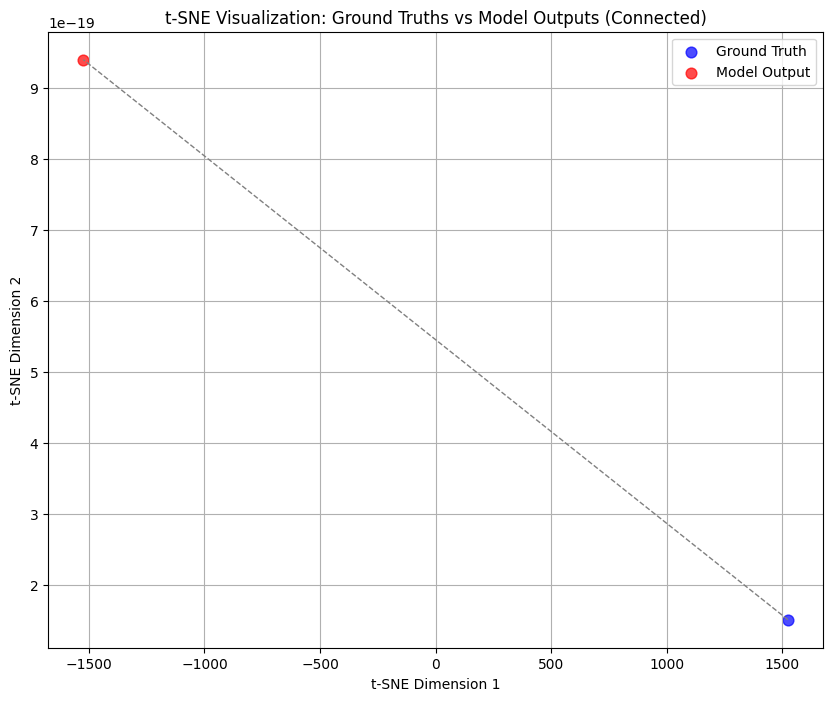

In [ ]:
from sklearn.manifold import TSNE
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import numpy as np
from sentence_transformers import SentenceTransformer

# Load model
model = SentenceTransformer('all-MiniLM-L6-v2')

#  Use YOUR lists directly
# ground_truths = [...]
# model_outputs = [...]

# Encode the sentences
ground_truth_embeddings = model.encode(ground_truths, normalize_embeddings=True)
model_output_embeddings = model.encode(model_outputs, normalize_embeddings=True)

# Combine embeddings
all_embeddings = np.vstack([ground_truth_embeddings, model_output_embeddings])

# Create labels
labels = ['Ground Truth'] * len(ground_truths) + ['Model Output'] * len(model_outputs)

#  Optional: PCA to 50D first
pca = PCA(n_components=min(50, all_embeddings.shape[0], all_embeddings.shape[1]))
pca_result = pca.fit_transform(all_embeddings)

#  Dynamic perplexity
n_samples = all_embeddings.shape[0]
perplexity = min(5, n_samples - 1)  # Must be < n_samples

# Apply t-SNE
tsne = TSNE(n_components=2, perplexity=perplexity, max_iter=1000, random_state=42)
embeddings_2d = tsne.fit_transform(pca_result)

# Plot with connection lines
plt.figure(figsize=(10, 8))

# Plot each group
for label_type, color in zip(['Ground Truth', 'Model Output'], ['blue', 'red']):
    idxs = [i for i, l in enumerate(labels) if l == label_type]
    plt.scatter(embeddings_2d[idxs, 0], embeddings_2d[idxs, 1], label=label_type, alpha=0.7, s=60, c=color)

# 🔗 Draw lines between GT and Prediction pairs
print(ground_truths)
n = len(ground_truths)
for i in range(n):
    plt.plot(
        [embeddings_2d[i, 0], embeddings_2d[n + i, 0]],
        [embeddings_2d[i, 1], embeddings_2d[n + i, 1]],
        color='gray', linestyle='--', linewidth=1
    )

# Final touches
plt.title('t-SNE Visualization: Ground Truths vs Model Outputs (Connected)')
plt.legend()
plt.xlabel('t-SNE Dimension 1')
plt.ylabel('t-SNE Dimension 2')
plt.grid(True)
plt.show()

In [ ]:
print("GT count:", len(ground_truths))
print("MO count:", len(model_outputs))


GT count: 1
MO count: 1


In [ ]:
ground_truths = cleaned_references[:1]  # maybe for testing?

In [ ]:
ground_truths = cleaned_references
model_outputs = cleaned_predictions


NameError: name 'cleaned_references' is not defined

In [ ]:
print(references[0])
print(predictions[0])


Excess weight increases insulin resistance, especially around the abdomen.
. Answer the user's diabetes-related question clearly and accurately.user
How does my weight affect my risk of type 2 diabetes?assistant
Good question! Being overweight or obese is a significant risk factor for developing insulin resistance and prediabetes, which can increase your likelihood of progressing to type 2 diabetes. Excess fat, particularly around the abdomen, increases the production of hormones that drive insulin resistance and glucose intolerance. Additionally, carrying extra weight puts additional stress on your pancreas, liver, and blood vessels, potentially leading to insulin resistance and glucose metabolism issues.

The National Institutes of Health suggests that maintaining a healthy body mass index (BMI) through a balanced diet and regular physical activity can help prevent or delay the onset of type 2 diabetes. Here are some general guidelines:

* For adults: Maintain a BMI between 18.5 and 

In [ ]:
print("References count:", len(references))
print("Predictions count:", len(predictions))
print()
print("Example Reference:", references[0])
print()
print("Example Prediction:", predictions[0])


References count: 50
Predictions count: 50

Example Reference: Excess weight increases insulin resistance, especially around the abdomen.

Example Prediction: . Answer the user's diabetes-related question clearly and accurately.user
How does my weight affect my risk of type 2 diabetes?assistant
Good question! Being overweight or obese is a significant risk factor for developing insulin resistance and prediabetes, which can increase your likelihood of progressing to type 2 diabetes. Excess fat, particularly around the abdomen, increases the production of hormones that drive insulin resistance and glucose intolerance. Additionally, carrying extra weight puts additional stress on your pancreas, liver, and blood vessels, potentially leading to insulin resistance and glucose metabolism issues.

The National Institutes of Health suggests that maintaining a healthy body mass index (BMI) through a balanced diet and regular physical activity can help prevent or delay the onset of type 2 diabete

In [ ]:
ground_truths = references
model_outputs = predictions


# TSNE PLot

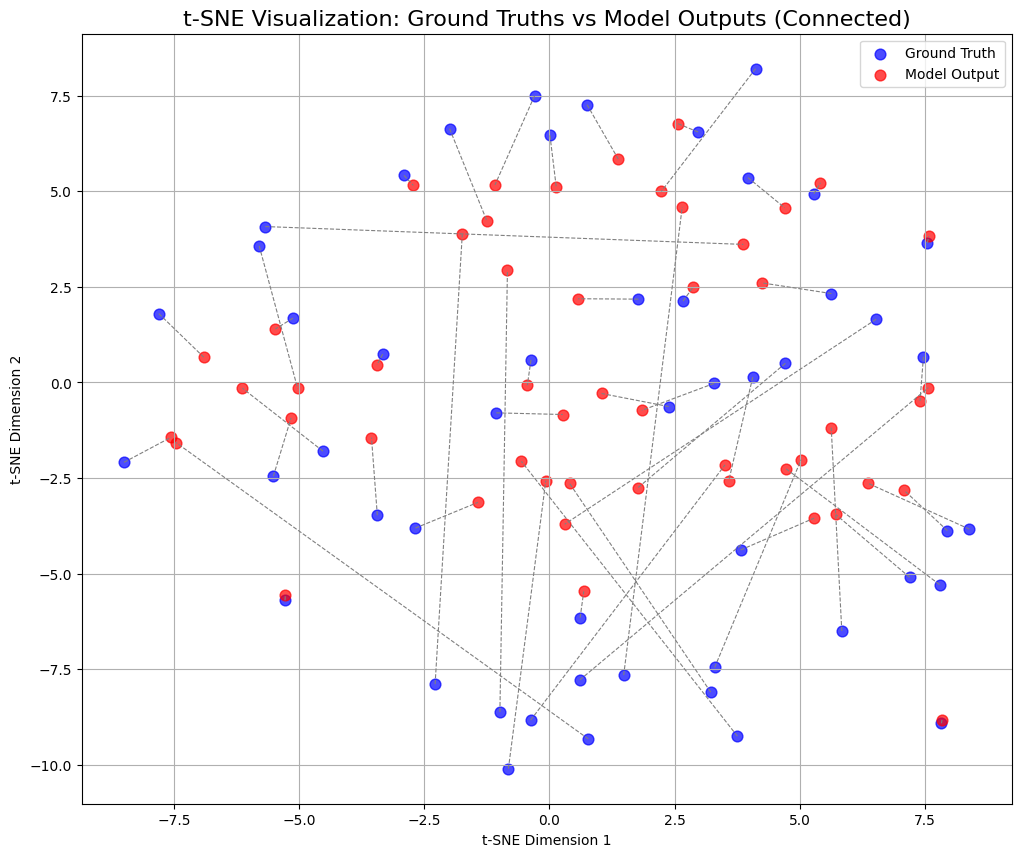

In [ ]:
from sklearn.manifold import TSNE
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import numpy as np
from sentence_transformers import SentenceTransformer

# Load the model
model = SentenceTransformer('all-MiniLM-L6-v2')

#  Assign your data
ground_truths = references   # <-- your 50 reference sentences
model_outputs = predictions  # <-- your 50 predicted sentences

#  Encode the sentences
ground_truth_embeddings = model.encode(ground_truths, normalize_embeddings=True)
model_output_embeddings = model.encode(model_outputs, normalize_embeddings=True)

#  Combine embeddings
all_embeddings = np.vstack([ground_truth_embeddings, model_output_embeddings])

#  Create labels
labels = ['Ground Truth'] * len(ground_truths) + ['Model Output'] * len(model_outputs)

#  Optional: PCA before t-SNE to make it more stable
pca = PCA(n_components=min(50, all_embeddings.shape[0], all_embeddings.shape[1]))
pca_result = pca.fit_transform(all_embeddings)

#  Dynamic perplexity
n_samples = all_embeddings.shape[0]  # Should be 100 now
perplexity = min(30, n_samples - 1)  # 30 is a good choice for 100 samples

#  Apply t-SNE
tsne = TSNE(n_components=2, perplexity=perplexity, max_iter=1000, random_state=42)
embeddings_2d = tsne.fit_transform(pca_result)

#  Plot with connection lines between GT and Prediction
plt.figure(figsize=(12, 10))

# Plot each group
for label_type, color in zip(['Ground Truth', 'Model Output'], ['blue', 'red']):
    idxs = [i for i, l in enumerate(labels) if l == label_type]
    plt.scatter(embeddings_2d[idxs, 0], embeddings_2d[idxs, 1], label=label_type, alpha=0.7, s=60, c=color)

# Draw lines between corresponding GT and model output
n = len(ground_truths)
for i in range(n):
    plt.plot(
        [embeddings_2d[i, 0], embeddings_2d[n + i, 0]],
        [embeddings_2d[i, 1], embeddings_2d[n + i, 1]],
        color='gray', linestyle='--', linewidth=0.8
    )

# Final touches
plt.title('t-SNE Visualization: Ground Truths vs Model Outputs (Connected)', fontsize=16)
plt.legend()
plt.xlabel('t-SNE Dimension 1')
plt.ylabel('t-SNE Dimension 2')
plt.grid(True)
plt.show()


# RAG

# Plan to use an excellent book on diabetes, we can make this system very personalised

In [ ]:
from google.colab import files
uploaded = files.upload()


Saving small_rag_doc.pdf to small_rag_doc.pdf


In [ ]:
# Install PyMuPDF if not installed
!pip install pymupdf

import fitz  # PyMuPDF

# Open the uploaded PDF
doc = fitz.open("small_rag_doc.pdf")

# Extract text from all pages
pdf_text = ""
for page in doc:
    pdf_text += page.get_text()

# Optional: Print the first 1000 characters to verify
print(pdf_text[:1000])


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 20.0/20.0 MB 112.4 MB/s eta 0:00:00
AMERICAN DIABETES
ASSOCIATION
COMPLETE GUIDE
TO DIABETES
4TH EDITION
COMPLETELY REVISED
Wr i t e r, Nancy Touchette, PhD; D i re c t o r, Book Publishing, John Fedor; Book Acquisitions,
Sherrye Landrum; Managing Editor, Abe Ogden; Editor, 4th Edition, Rebecca Lanning;
Production Manager, Melissa Sprott; Composition, Circle Graphics, Inc.; Cover Design,
Koncept, Inc.; Printer, Port City Press.
©1999, 2005 by the American Diabetes Association, Inc. All Rights Reserved. No part of
this publication may be re p roduced or transmitted in any form or by any means, electro n i c
or mechanical, including duplication, re c o rding, or any information storage 
and retrieval system, without the prior written permission of the American Diabetes
Association.
Printed in the United States of America
1 3 5 7 9 10 8 6 4 2
The suggestions and information contained in this publication are generally consistent
with the Clinical

# RAG Setup

In [ ]:
# Split the extracted text into chunks (around 500 characters each)
def split_text(text, chunk_size=500, overlap=50):
    chunks = []
    start = 0
    while start < len(text):
        end = start + chunk_size
        chunks.append(text[start:end])
        start += chunk_size - overlap  # move forward with overlap
    return chunks

# Split the PDF text
text_chunks = split_text(pdf_text)

print(f"Number of chunks created: {len(text_chunks)}")
print("\nExample chunk:\n", text_chunks[0])


Number of chunks created: 1990

Example chunk:
 AMERICAN DIABETES
ASSOCIATION
COMPLETE GUIDE
TO DIABETES
4TH EDITION
COMPLETELY REVISED
Wr i t e r, Nancy Touchette, PhD; D i re c t o r, Book Publishing, John Fedor; Book Acquisitions,
Sherrye Landrum; Managing Editor, Abe Ogden; Editor, 4th Edition, Rebecca Lanning;
Production Manager, Melissa Sprott; Composition, Circle Graphics, Inc.; Cover Design,
Koncept, Inc.; Printer, Port City Press.
©1999, 2005 by the American Diabetes Association, Inc. All Rights Reserved. No part of
this publication 


In [ ]:
# Use your already loaded model
# model = SentenceTransformer('all-MiniLM-L6-v2')  # (already loaded)

# Create embeddings for all chunks
chunk_embeddings = model.encode(text_chunks, normalize_embeddings=True)

print("Embeddings shape:", chunk_embeddings.shape)


Embeddings shape: (1990, 384)


In [ ]:
from sklearn.metrics.pairwise import cosine_similarity
import numpy as np

# Retrieval function
def retrieve_relevant_chunks(question, chunk_texts, chunk_embeddings, model, top_k=5):
    # 1. Encode the question
    question_embedding = model.encode([question], normalize_embeddings=True)

    # 2. Compute cosine similarity with all chunk embeddings
    similarities = cosine_similarity(question_embedding, chunk_embeddings)[0]

    # 3. Get the top-k most similar chunks
    top_k_idx = np.argsort(similarities)[-top_k:][::-1]

    # 4. Retrieve corresponding chunks
    retrieved_chunks = [chunk_texts[idx] for idx in top_k_idx]

    return retrieved_chunks

#  Example usage:
question = "What are early symptoms of diabetes?"
top_chunks = retrieve_relevant_chunks(question, text_chunks, chunk_embeddings, model)

print("\nTop retrieved chunks:")
for idx, chunk in enumerate(top_chunks):
    print(f"\n--- Chunk {idx+1} ---\n{chunk}")



Top retrieved chunks:

--- Chunk 1 ---
ave diabetes. Symptoms of
diabetes include frequent urination, intense thirst, blurred
vision, unexplained weight loss, and extreme tiredness.
The preferred method for diagnosing diabetes is the fasting
plasma glucose test. In diabetes, extra glucose remains in the
blood, even after fasting. For this test, you will be asked not to
eat or drink anything but water for at least 8 to 10 hours. Then,
a sample of your blood is taken from a vein and the amount of
glucose present in the blood is measure

--- Chunk 2 ---
od. A major problem—and the
304
ADA COMPLETE GUIDE TO DIABETES
Warning Signs of Diabetes Complications
Anytime you “just don’t feel right” and
can’t explain it, you need to tell your
provider. Call right away if you notice any
of these signs:
●Ê vision problems, such as blurry or spotty
vision or ﬂashes
●unexplained, overwhelming tiredness
●discomfort in your legs when walking
●numbness or tingling in your hands or feet
●chest pain that c

In [ ]:
# Step 1: User question
question = "What are early symptoms of diabetes?"

# Step 2: Retrieve context
retrieved_chunks = retrieve_relevant_chunks(question, text_chunks, chunk_embeddings, model)

# Step 3: Combine retrieved context with question
context = "\n\n".join(retrieved_chunks)
full_prompt = f"Context:\n{context}\n\nQuestion: {question}\nAnswer:"

# Step 4: Feed full_prompt to your model (e.g., LLM, your assistant)
# (I'll show you how exactly depending on your model.)

In [ ]:
from peft import PeftModel, PeftConfig
from transformers import AutoModelForCausalLM, AutoTokenizer, BitsAndBytesConfig
import torch

adapter_path = "/content/llama3_diabetes_lora"

#  load tokenizer
tok = AutoTokenizer.from_pretrained(adapter_path)

#  load base model with CPU offload
base_id = PeftConfig.from_pretrained(adapter_path).base_model_name_or_path
bnb_cfg = BitsAndBytesConfig(
    load_in_4bit=True,
    bnb_4bit_compute_dtype="bfloat16",
    bnb_4bit_use_double_quant=True,
    bnb_4bit_quant_type="nf4",
    llm_int8_enable_fp32_cpu_offload=True,
)

base = AutoModelForCausalLM.from_pretrained(
    base_id,
    quantization_config=bnb_cfg,
    device_map="auto",  #  SMART device placement
    trust_remote_code=True
)

#  attach LoRA
model = PeftModel.from_pretrained(base, adapter_path)
model.eval()

#  DO NOT call model.to('cuda') — not needed, otherwise crash


Loading checkpoint shards:   0%|          | 0/4 [00:00<?, ?it/s]

PeftModelForCausalLM(
  (base_model): LoraModel(
    (model): LlamaForCausalLM(
      (model): LlamaModel(
        (embed_tokens): Embedding(128256, 4096)
        (layers): ModuleList(
          (0-31): 32 x LlamaDecoderLayer(
            (self_attn): LlamaAttention(
              (q_proj): lora.Linear4bit(
                (base_layer): Linear4bit(in_features=4096, out_features=4096, bias=False)
                (lora_dropout): ModuleDict(
                  (default): Dropout(p=0.05, inplace=False)
                )
                (lora_A): ModuleDict(
                  (default): Linear(in_features=4096, out_features=8, bias=False)
                )
                (lora_B): ModuleDict(
                  (default): Linear(in_features=8, out_features=4096, bias=False)
                )
                (lora_embedding_A): ParameterDict()
                (lora_embedding_B): ParameterDict()
                (lora_magnitude_vector): ModuleDict()
              )
              (k_proj): lora.